# 数据读取

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('D:\\工作\\2019-5-9')

In [7]:
Data=pd.read_excel('izi_wd_20190509 - 副本.xlsx',header=0)

In [8]:
Data.head(5)

,姓名,手机号,身份证,常用联系人号码,常用联系人号码.1,常用联系人号码.2,常用联系人号码.3,常用联系人号码.4,身份证和姓名是否匹配,身份认证_姓名,...,号码21天之内查询贷款机构的数量,号码30天之内查询贷款机构的数量,号码60天之内查询贷款机构的数量,号码90天之内查询贷款机构的数量,号码查询贷款机构的总数量,一人多号状态,身份证号码下面的手机号,手机号所属的身份证号,手机号所属身份证号下的手机号,申请状态
0,zuliardi,82176468047,1671102004840002,NaN,NaN,NaN,NaN,NaN,OK,ZULIARDI,...,6,7,12,14,25,OK,"+6285658704497,+6282176468017",1.871067e+15,+6282176468047,已拒绝
1,zuliardi,82176468047,1671102004840002,NaN,NaN,NaN,NaN,NaN,OK,ZULIARDI,...,6,7,12,14,25,OK,"+6285658704497,+6282176468017",1.871067e+15,+6282176468047,已拒绝
2,zelika,89617351676,3173064311940003,NaN,NaN,NaN,NaN,NaN,OK,ZELIKA,...,1,1,1,1,13,ALL_FOUND,NaN,NaN,NaN,已还清
3,zauhari,85105766003,3571030510700001,NaN,NaN,NaN,NaN,NaN,OK,ZAUHARI,...,1,2,3,6,6,OK,"+6281230077668,+6281515434378,+6285105766003,+...",3.571031e+15,"+6281230077668,+6281515434378,+6285105766003,+...",逾期
4,zaina rosita,81210027046,1671155712750001,NaN,NaN,NaN,NaN,NaN,OK,ZAINA ROSITA,...,10,14,27,27,28,NOT_FOUND,NaN,NaN,NaN,已还清


In [9]:
Data.shape

(5000, 50)

In [10]:
Data.drop(Data['身份证'][Data.duplicated('身份证',keep='last')].index,inplace=True)
Data=Data.reset_index(drop=True)
Data.shape

(4847, 50)

In [11]:
Data=Data.fillna('空值')
Data['申请状态'].value_counts()

已拒绝    1947
已还清    1704
逾期     1196
Name: 申请状态, dtype: int64

In [12]:
Data['身份证号码下面的手机号'][2]

'+6281230077668,+6281515434378,+6285105766003,+6281333003678'

In [29]:
Dataperson_info=pd.DataFrame()
Dataperson_info['手机号']=Data['手机号'].astype('str')
Dataperson_info['身份证']=Data['身份证'].astype('str')
Dataperson_info['身份证号码下面的手机号']=Data['身份证号码下面的手机号'].astype('str')
Dataperson_info['手机号所属的身份证号']=Data['手机号所属的身份证号'].astype('str')
Dataperson_info['手机号所属身份证号下的手机号']=Data['手机号所属身份证号下的手机号'].astype('str')
Dataperson_info['申请状态']=Data['申请状态'].astype('str')
Dataperson_info.head(5)

,手机号,身份证,身份证号码下面的手机号,手机号所属的身份证号,手机号所属身份证号下的手机号,申请状态
0,82176468047,1671102004840002,"+6285658704497,+6282176468017",1871066703990003.0,+6282176468047,已拒绝
1,89617351676,3173064311940003,空值,空值,空值,已还清
2,85105766003,3571030510700001,"+6281230077668,+6281515434378,+6285105766003,+...",3571030510700001.0,"+6281230077668,+6281515434378,+6285105766003,+...",逾期
3,81210027046,1671155712750001,空值,空值,空值,已还清
4,85266448739,3210071601750001,+6285295989679,空值,空值,已拒绝


In [33]:
Dataperson_info['身份证号码下面的手机号'][2].split(',')

['+6281230077668', '+6281515434378', '+6285105766003', '+6281333003678']

In [38]:
for i in range(len(Dataperson_info['身份证号码下面的手机号'])):
    if Dataperson_info['身份证号码下面的手机号'][i]!='空值':
        Dataperson_info['身份证号码下面的手机号'][i]=len(Dataperson_info['身份证号码下面的手机号'][i].split(','))
    else:
        pass        

In [40]:
yuqi_index=Dataperson_info['申请状态'][Dataperson_info['申请状态']=='逾期'].index
yijj_index=Dataperson_info['申请状态'][Dataperson_info['申请状态']=='已拒绝'].index
yihq_index=Dataperson_info['申请状态'][Dataperson_info['申请状态']=='已还清'].index

In [ ]:
Dataperson_info['身份证号码下面的手机号']

In [51]:
zongshu_ex_yjj=Dataperson_info['身份证号码下面的手机号'][~Dataperson_info['身份证号码下面的手机号'].index.isin(yijj_index)].reset_index(drop = True)
zongshu=Dataperson_info['身份证号码下面的手机号'].value_counts()
df=pd.DataFrame()
df['总数']=Dataperson_info['身份证号码下面的手机号'].value_counts()
df.index=zongshu.index
#   df[name]=df.index
df['逾期数']=Dataperson_info['身份证号码下面的手机号'][yuqi_index].value_counts()
df['已还清数']=Dataperson_info['身份证号码下面的手机号'][yihq_index].value_counts()
df['逾期还清总数']=zongshu_ex_yjj.value_counts()
df['逾期率']=Dataperson_info['身份证号码下面的手机号'][yuqi_index].value_counts()/zongshu_ex_yjj.value_counts()
df['已还清率']=1-df['逾期率']
df['已拒绝数']=Dataperson_info['身份证号码下面的手机号'][yijj_index].value_counts()
df['已拒绝率']=Dataperson_info['身份证号码下面的手机号'][yijj_index].value_counts()/Dataperson_info['身份证号码下面的手机号'].value_counts()
print('逾期\n',Dataperson_info['身份证号码下面的手机号'][yuqi_index].value_counts())
print('已拒绝\n',Dataperson_info['身份证号码下面的手机号'][yijj_index].value_counts())
print('已还清\n',Dataperson_info['身份证号码下面的手机号'][yihq_index].value_counts())
##一人多号个数
df

逾期
 空值    584
1     252
2     240
3      78
4      27
5       8
6       3
11      1
9       1
15      1
7       1
Name: 身份证号码下面的手机号, dtype: int64
已拒绝
 空值    915
2     391
1     375
3     171
4      49
5      27
6       5
7       4
15      2
13      2
10      2
8       2
12      1
11      1
Name: 身份证号码下面的手机号, dtype: int64
已还清
 空值    803
2     404
1     271
3     149
4      49
5      17
8       4
7       2
6       2
13      1
11      1
10      1
Name: 身份证号码下面的手机号, dtype: int64


,总数,逾期数,已还清数,逾期还清总数,逾期率,已还清率,已拒绝数,已拒绝率
空值,2302,584.0,803.0,1387.0,0.421053,0.578947,915.0,0.397480
2,1035,240.0,404.0,644.0,0.372671,0.627329,391.0,0.377778
1,898,252.0,271.0,523.0,0.481836,0.518164,375.0,0.417595
3,398,78.0,149.0,227.0,0.343612,0.656388,171.0,0.429648
4,125,27.0,49.0,76.0,0.355263,0.644737,49.0,0.392000
5,52,8.0,17.0,25.0,0.320000,0.680000,27.0,0.519231
6,10,3.0,2.0,5.0,0.600000,0.400000,5.0,0.500000
7,7,1.0,2.0,3.0,0.333333,0.666667,4.0,0.571429
8,6,NaN,4.0,4.0,NaN,NaN,2.0,0.333333
15,3,1.0,NaN,1.0,1.000000,0.000000,2.0,0.666667


In [77]:
IIndex=Dataperson_info['手机号所属的身份证号'][Dataperson_info['手机号所属的身份证号']!='空值'].index
VV=Dataperson_info['身份证'][IIndex]

In [95]:
WW=Dataperson_info['手机号所属的身份证号'][Dataperson_info['手机号所属的身份证号']!='空值'].reset_index(drop = True)
for num in range(len(WW)):
    WW[num]=WW[num].split('.')[0]

In [96]:
WW=pd.Series(list(WW),index=VV.index)

In [109]:
print('身份证相同对应:',sum(Dataperson_info['申请状态'][WW[WW==VV].index].value_counts())/4847)
print(Dataperson_info['申请状态'][WW[WW==VV].index].value_counts())
print('逾期率：',179/(179+466))

身份证相同对应: 0.2110583866309057
已还清    466
已拒绝    378
逾期     179
Name: 申请状态, dtype: int64
逾期率： 0.2775193798449612


In [117]:
QQ=Dataperson_info['申请状态'][~Dataperson_info['申请状态'].index.isin(WW[WW==VV].index)].value_counts()
print('身份证不对应:',sum(QQ)/4847)
print(QQ)
print('逾期率：',1017/(1017+1569))

身份证不对应: 0.7889416133690943
已拒绝    1569
已还清    1238
逾期     1017
Name: 申请状态, dtype: int64
逾期率： 0.39327146171693733


In [119]:
Dataperson_info['手机号所属身份证号下的手机号'][WW[WW==VV].index]

2       +6281230077668,+6281515434378,+6285105766003,+...
5                           +6285876697374,+6285642842901
6                            +6289502215668,+628996208450
9                           +6281318322629,+6285217657277
10      +6281286914525,+62895365313643,+62895320659080...
11                          +6281226051924,+6282243876226
15      +6285836127965,+6285836127969,+6281536193476,+...
16                           +6285890296491,+628161115425
18                         +6281297321240,+62895327200127
19                          +6282328183862,+6285641751570
24      +6281315710303,+6281291635072,+62895411871302,...
25                          +6285717060221,+6281288198467
27                         +6281219704745,+62895344142265
37                          +6281575427414,+6282136363090
40                          +6289659110926,+6285862859808
41      +6285357691800,+6285712767089,+6282133578155,+...
42           +6281210131729,+6281210131726,+6281212803661
44      +62895

In [123]:
len(Data['身份证号码下面的手机号'][WW[WW==VV].index][Data['身份证号码下面的手机号'][WW[WW==VV].index]==
Dataperson_info['手机号所属身份证号下的手机号'][WW[WW==VV].index]])

1023

# 分析单个特征

In [14]:
Data['申请状态'].value_counts()

已拒绝    2000
已还清    1800
逾期     1200
Name: 申请状态, dtype: int64

In [7]:
Data['申请状态'].value_counts()/sum(Data['申请状态'].value_counts())

已拒绝    0.40
已还清    0.36
逾期     0.24
Name: 申请状态, dtype: float64

In [8]:
len(pd.unique(Data['身份证']))

4847

In [9]:
label_data=pd.read_excel('测试.xls',header=0)
label_data

,Unnamed: 0,用户姓名,手机号,证件号码,申请状态
0,164349,zuliardi,82176468047,1671102004840002,已拒绝
1,158153,zuliardi,82176468047,1671102004840002,已拒绝
2,156597,zelika,89617351676,3173064311940003,已还清
3,108240,zauhari,85105766003,3571030510700001,逾期
4,47369,zaina rosita,81210027046,1671155712750001,已还清
5,184742,yusuf mulyana,85266448739,3210071601750001,已拒绝
6,53055,yusmanto,85876697374,3375040607850005,已拒绝
7,64587,yuni yuningsih,89502215668,3215154109930005,已拒绝
8,171319,yuliadi iwayan,82146177622,5104041207690001,已拒绝
9,158062,yuliadi iwayan,82146177622,5104041207690001,已拒绝


In [10]:
len(pd.unique(label_data['Unnamed: 0']))

5000

In [11]:
yq_index=Data['申请状态'][Data['申请状态']=='逾期'].index
yjj_index=Data['申请状态'][Data['申请状态']=='已拒绝'].index
yhq_index=Data['申请状态'][Data['申请状态']=='已还清'].index

In [12]:
len(yq_index),len(yjj_index),len(yhq_index)

(1200, 2000, 1800)

**身份证和姓名是否匹配**

In [12]:
zongshu=Data['身份证和姓名是否匹配'][~Data['身份证和姓名是否匹配'].index.isin(yjj_index)].reset_index(drop = True)

In [13]:
zongshu.value_counts()

OK                  2746
PERSON_NOT_FOUND     158
NOT                   96
Name: 身份证和姓名是否匹配, dtype: int64

In [14]:
zongshu.value_counts().index

Index(['OK', 'PERSON_NOT_FOUND', 'NOT'], dtype='object')

In [15]:
print(Data['身份证和姓名是否匹配'][yq_index].value_counts())
print(zongshu.value_counts())
print(Data['身份证和姓名是否匹配'][yq_index].value_counts()/zongshu.value_counts())
df=pd.DataFrame()
df.reindex(zongshu.value_counts().index)
df['逾期数']=Data['身份证和姓名是否匹配'][yq_index].value_counts()
df['总数']=zongshu.value_counts()
df['逾期率']=Data['身份证和姓名是否匹配'][yq_index].value_counts()/zongshu.value_counts()
df

OK                  1049
PERSON_NOT_FOUND     101
NOT                   50
Name: 身份证和姓名是否匹配, dtype: int64
OK                  2746
PERSON_NOT_FOUND     158
NOT                   96
Name: 身份证和姓名是否匹配, dtype: int64
OK                  0.382010
PERSON_NOT_FOUND    0.639241
NOT                 0.520833
Name: 身份证和姓名是否匹配, dtype: float64


,逾期数,总数,逾期率
OK,1049,2746,0.382010
PERSON_NOT_FOUND,101,158,0.639241
NOT,50,96,0.520833


In [16]:
Data['身份证和姓名是否匹配'].value_counts().index

Index(['OK', 'PERSON_NOT_FOUND', 'NOT', 'INVALID_ID_NUMBER'], dtype='object')

In [17]:
print(Data['身份证和姓名是否匹配'][yjj_index].value_counts())
print(Data['身份证和姓名是否匹配'].value_counts())
print(Data['身份证和姓名是否匹配'][yjj_index].value_counts()/Data['身份证和姓名是否匹配'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份证和姓名是否匹配'].value_counts().index)
df['已拒绝数']=Data['身份证和姓名是否匹配'][yjj_index].value_counts()
df['总数']=Data['身份证和姓名是否匹配'].value_counts()
df['已拒绝率']=Data['身份证和姓名是否匹配'][yjj_index].value_counts()/Data['身份证和姓名是否匹配'].value_counts()
df

OK                   1705
PERSON_NOT_FOUND      187
NOT                   107
INVALID_ID_NUMBER       1
Name: 身份证和姓名是否匹配, dtype: int64
OK                   4451
PERSON_NOT_FOUND      345
NOT                   203
INVALID_ID_NUMBER       1
Name: 身份证和姓名是否匹配, dtype: int64
OK                   0.383060
PERSON_NOT_FOUND     0.542029
NOT                  0.527094
INVALID_ID_NUMBER    1.000000
Name: 身份证和姓名是否匹配, dtype: float64


,已拒绝数,总数,已拒绝率
OK,1705,4451,0.383060
PERSON_NOT_FOUND,187,345,0.542029
NOT,107,203,0.527094
INVALID_ID_NUMBER,1,1,1.000000


In [18]:
print(Data['身份证和姓名是否匹配'][yhq_index].value_counts())
print(zongshu.value_counts())
print(Data['身份证和姓名是否匹配'][yhq_index].value_counts()/Data['身份证和姓名是否匹配'].value_counts())
df=pd.DataFrame()
df.reindex(zongshu.value_counts().index)
df['已还清数']=Data['身份证和姓名是否匹配'][yhq_index].value_counts()
df['总数']=zongshu.value_counts()
df['已还清率']=Data['身份证和姓名是否匹配'][yhq_index].value_counts()/zongshu.value_counts()
df

OK                  1697
PERSON_NOT_FOUND      57
NOT                   46
Name: 身份证和姓名是否匹配, dtype: int64
OK                  2746
PERSON_NOT_FOUND     158
NOT                   96
Name: 身份证和姓名是否匹配, dtype: int64
INVALID_ID_NUMBER         NaN
NOT                  0.226601
OK                   0.381263
PERSON_NOT_FOUND     0.165217
Name: 身份证和姓名是否匹配, dtype: float64


,已还清数,总数,已还清率
OK,1697,2746,0.617990
PERSON_NOT_FOUND,57,158,0.360759
NOT,46,96,0.479167


In [19]:
2746/3000

0.9153333333333333

**身份认证_性别**

In [20]:
zongshu_sex=Data['身份认证_性别'][~Data['身份认证_性别'].index.isin(yjj_index)].reset_index(drop = True)

In [21]:
print(Data['身份认证_性别'][yq_index].value_counts())
print(zongshu_sex.value_counts())
print(Data['身份认证_性别'][yq_index].value_counts()/Data['身份认证_性别'].value_counts())
df=pd.DataFrame()
df.reindex(zongshu_sex.value_counts().index)
df['逾期数']=Data['身份认证_性别'][yq_index].value_counts()
df['总数']=zongshu_sex.value_counts()
df['逾期率']=Data['身份认证_性别'][yq_index].value_counts()/zongshu_sex.value_counts()
df

LAKI-LAKI    636
PEREMPUAN    463
Name: 身份认证_性别, dtype: int64
PEREMPUAN    1562
LAKI-LAKI    1280
Name: 身份认证_性别, dtype: int64
LAKI-LAKI    0.274374
PEREMPUAN    0.198202
Name: 身份认证_性别, dtype: float64


,逾期数,总数,逾期率
LAKI-LAKI,636,1280,0.496875
PEREMPUAN,463,1562,0.296415


In [22]:
print(Data['身份认证_性别'][yjj_index].value_counts())
print(Data['身份认证_性别'].value_counts())
print(Data['身份认证_性别'][yjj_index].value_counts()/Data['身份认证_性别'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份认证_性别'].value_counts().index)
df['已拒绝数']=Data['身份认证_性别'][yjj_index].value_counts()
df['总数']=Data['身份认证_性别'].value_counts()
df['已拒绝率']=Data['身份认证_性别'][yjj_index].value_counts()/Data['身份认证_性别'].value_counts()
df

LAKI-LAKI    1038
PEREMPUAN     774
Name: 身份认证_性别, dtype: int64
PEREMPUAN    2336
LAKI-LAKI    2318
Name: 身份认证_性别, dtype: int64
LAKI-LAKI    0.447800
PEREMPUAN    0.331336
Name: 身份认证_性别, dtype: float64


,已拒绝数,总数,已拒绝率
LAKI-LAKI,1038,2318,0.447800
PEREMPUAN,774,2336,0.331336


In [23]:
Data['身份认证_性别'][yq_index].value_counts()

LAKI-LAKI    636
PEREMPUAN    463
Name: 身份认证_性别, dtype: int64

In [24]:
print(Data['身份认证_性别'][yhq_index].value_counts())
print(zongshu_sex.value_counts())
print(Data['身份认证_性别'][yhq_index].value_counts()/zongshu_sex.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_sex.value_counts().index)
df['已还清数']=Data['身份认证_性别'][yhq_index].value_counts()
df['总数']=zongshu_sex.value_counts()
df['已还清率']=Data['身份认证_性别'][yhq_index].value_counts()/zongshu_sex.value_counts()
df

PEREMPUAN    1099
LAKI-LAKI     644
Name: 身份认证_性别, dtype: int64
PEREMPUAN    1562
LAKI-LAKI    1280
Name: 身份认证_性别, dtype: int64
PEREMPUAN    0.703585
LAKI-LAKI    0.503125
Name: 身份认证_性别, dtype: float64


,已还清数,总数,已还清率
PEREMPUAN,1099,1562,0.703585
LAKI-LAKI,644,1280,0.503125


In [25]:
Data['申请状态'][Data['身份认证_性别'][Data['身份认证_性别'].isnull()].index].value_counts()

已拒绝    188
逾期     101
已还清     57
Name: 申请状态, dtype: int64

In [26]:
sum(Data['身份认证_性别'].value_counts())

4654

In [27]:
sum(Data['身份认证_性别'][yq_index].value_counts())

1099

**身份认证_宗教信仰**

In [28]:
zongshu_zjxy=Data['身份认证_宗教信仰'][~Data['身份认证_宗教信仰'].index.isin(yjj_index)].reset_index(drop = True)

In [29]:
print(Data['身份认证_宗教信仰'][yq_index].value_counts())
print(zongshu_zjxy.value_counts())
print(Data['身份认证_宗教信仰'][yq_index].value_counts()/zongshu_zjxy.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_zjxy.value_counts().index)
df['逾期数']=Data['身份认证_宗教信仰'][yq_index].value_counts()
df['总数']=zongshu_zjxy.value_counts()
df['逾期率']=Data['身份认证_宗教信仰'][yq_index].value_counts()/zongshu_zjxy.value_counts()
df

ISLAM       1008
KRISTEN       56
KATHOLIK      17
BUDHA         13
HINDU          5
Name: 身份认证_宗教信仰, dtype: int64
ISLAM       2517
KRISTEN      203
KATHOLIK      70
BUDHA         40
HINDU         12
Name: 身份认证_宗教信仰, dtype: int64
ISLAM       0.400477
KRISTEN     0.275862
KATHOLIK    0.242857
BUDHA       0.325000
HINDU       0.416667
Name: 身份认证_宗教信仰, dtype: float64


,逾期数,总数,逾期率
ISLAM,1008,2517,0.400477
KRISTEN,56,203,0.275862
KATHOLIK,17,70,0.242857
BUDHA,13,40,0.325000
HINDU,5,12,0.416667


In [30]:
print(Data['身份认证_宗教信仰'][yjj_index].value_counts())
print(Data['身份认证_宗教信仰'].value_counts())
print(Data['身份认证_宗教信仰'][yjj_index].value_counts()/Data['身份认证_宗教信仰'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份认证_宗教信仰'].value_counts().index)
df['已拒绝数']=Data['身份认证_宗教信仰'][yjj_index].value_counts()
df['总数']=Data['身份认证_宗教信仰'].value_counts()
df['已拒绝率']=Data['身份认证_宗教信仰'][yjj_index].value_counts()/Data['身份认证_宗教信仰'].value_counts()
df

ISLAM       1638
KRISTEN      105
KATHOLIK      37
BUDHA         21
HINDU         11
Name: 身份认证_宗教信仰, dtype: int64
ISLAM       4155
KRISTEN      308
KATHOLIK     107
BUDHA         61
HINDU         23
Name: 身份认证_宗教信仰, dtype: int64
ISLAM       0.394224
KRISTEN     0.340909
KATHOLIK    0.345794
BUDHA       0.344262
HINDU       0.478261
Name: 身份认证_宗教信仰, dtype: float64


,已拒绝数,总数,已拒绝率
ISLAM,1638,4155,0.394224
KRISTEN,105,308,0.340909
KATHOLIK,37,107,0.345794
BUDHA,21,61,0.344262
HINDU,11,23,0.478261


In [31]:
print(Data['身份认证_宗教信仰'][yhq_index].value_counts())
print(zongshu_zjxy.value_counts())
print(Data['身份认证_宗教信仰'][yhq_index].value_counts()/zongshu_zjxy.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_zjxy.value_counts().index)
df['已还清数']=Data['身份认证_宗教信仰'][yhq_index].value_counts()
df['总数']=zongshu_zjxy.value_counts()
df['已还清率']=Data['身份认证_宗教信仰'][yhq_index].value_counts()/zongshu_zjxy.value_counts()
df

ISLAM       1509
KRISTEN      147
KATHOLIK      53
BUDHA         27
HINDU          7
Name: 身份认证_宗教信仰, dtype: int64
ISLAM       2517
KRISTEN      203
KATHOLIK      70
BUDHA         40
HINDU         12
Name: 身份认证_宗教信仰, dtype: int64
ISLAM       0.599523
KRISTEN     0.724138
KATHOLIK    0.757143
BUDHA       0.675000
HINDU       0.583333
Name: 身份认证_宗教信仰, dtype: float64


,已还清数,总数,已还清率
ISLAM,1509,2517,0.599523
KRISTEN,147,203,0.724138
KATHOLIK,53,70,0.757143
BUDHA,27,40,0.675000
HINDU,7,12,0.583333


In [32]:
Data['申请状态'][Data['身份认证_宗教信仰'][Data['身份认证_宗教信仰'].isnull()].index].value_counts()

已拒绝    188
逾期     101
已还清     57
Name: 申请状态, dtype: int64

**身份认证_婚姻状况**

In [33]:
zongshu_hyzk=Data['身份认证_婚姻状况'][~Data['身份认证_婚姻状况'].index.isin(yjj_index)].reset_index(drop = True)

In [34]:
# 身份认证_婚姻状况
print(Data['身份认证_婚姻状况'][yq_index].value_counts())
print(zongshu_hyzk.value_counts())
print(Data['身份认证_婚姻状况'][yq_index].value_counts()/zongshu_hyzk.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_hyzk.value_counts().index)
df['逾期数']=Data['身份认证_婚姻状况'][yq_index].value_counts()
df['总数']=zongshu_hyzk.value_counts()
df['逾期率']=Data['身份认证_婚姻状况'][yq_index].value_counts()/zongshu_hyzk.value_counts()
df

KAWIN           640
BELUM KAWIN     419
CERAI HIDUP      38
CERAI MATI        2
Name: 身份认证_婚姻状况, dtype: int64
KAWIN           1770
BELUM KAWIN      947
CERAI HIDUP      107
CERAI MATI        18
Name: 身份认证_婚姻状况, dtype: int64
KAWIN           0.361582
BELUM KAWIN     0.442450
CERAI HIDUP     0.355140
CERAI MATI      0.111111
Name: 身份认证_婚姻状况, dtype: float64


,逾期数,总数,逾期率
KAWIN,640,1770,0.361582
BELUM KAWIN,419,947,0.442450
CERAI HIDUP,38,107,0.355140
CERAI MATI,2,18,0.111111


In [35]:
Data['申请状态'][Data['身份认证_婚姻状况'][Data['身份认证_婚姻状况'].isnull()].index].value_counts()

已拒绝    188
逾期     101
已还清     57
Name: 申请状态, dtype: int64

In [36]:
sum(Data['身份认证_婚姻状况'].value_counts())

4654

In [37]:
sum(Data['身份认证_婚姻状况'][yq_index].value_counts())

1099

In [38]:
print(Data['身份认证_婚姻状况'][yjj_index].value_counts())
print(Data['身份认证_婚姻状况'].value_counts())
print(Data['身份认证_婚姻状况'][yjj_index].value_counts()/Data['身份认证_婚姻状况'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份认证_婚姻状况'].value_counts().index)
df['已拒绝数']=Data['身份认证_婚姻状况'][yjj_index].value_counts()
df['总数']=Data['身份认证_婚姻状况'].value_counts()
df['已拒绝率']=Data['身份认证_婚姻状况'][yjj_index].value_counts()/Data['身份认证_婚姻状况'].value_counts()
df

KAWIN           1046
BELUM KAWIN      697
CERAI HIDUP       54
CERAI MATI        15
Name: 身份认证_婚姻状况, dtype: int64
KAWIN           2816
BELUM KAWIN     1644
CERAI HIDUP      161
CERAI MATI        33
Name: 身份认证_婚姻状况, dtype: int64
KAWIN           0.371449
BELUM KAWIN     0.423966
CERAI HIDUP     0.335404
CERAI MATI      0.454545
Name: 身份认证_婚姻状况, dtype: float64


,已拒绝数,总数,已拒绝率
KAWIN,1046,2816,0.371449
BELUM KAWIN,697,1644,0.423966
CERAI HIDUP,54,161,0.335404
CERAI MATI,15,33,0.454545


In [39]:
print(Data['身份认证_婚姻状况'][yhq_index].value_counts())
print(zongshu_hyzk.value_counts())
print(Data['身份认证_婚姻状况'][yhq_index].value_counts()/zongshu_hyzk.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_hyzk.value_counts().index)
df['已还清数']=Data['身份认证_婚姻状况'][yhq_index].value_counts()
df['总数']=zongshu_hyzk.value_counts()
df['已还清率']=Data['身份认证_婚姻状况'][yhq_index].value_counts()/zongshu_hyzk.value_counts()
df

KAWIN           1130
BELUM KAWIN      528
CERAI HIDUP       69
CERAI MATI        16
Name: 身份认证_婚姻状况, dtype: int64
KAWIN           1770
BELUM KAWIN      947
CERAI HIDUP      107
CERAI MATI        18
Name: 身份认证_婚姻状况, dtype: int64
KAWIN           0.638418
BELUM KAWIN     0.557550
CERAI HIDUP     0.644860
CERAI MATI      0.888889
Name: 身份认证_婚姻状况, dtype: float64


,已还清数,总数,已还清率
KAWIN,1130,1770,0.638418
BELUM KAWIN,528,947,0.557550
CERAI HIDUP,69,107,0.644860
CERAI MATI,16,18,0.888889


**身份认证_职业**

In [40]:
zongshu_zhiye=Data['身份认证_职业'][~Data['身份认证_职业'].index.isin(yjj_index)].reset_index(drop = True)

In [41]:
print(Data['身份认证_职业'][yq_index].value_counts())
print(zongshu_zhiye.value_counts())
print(Data['身份认证_职业'][yq_index].value_counts()/zongshu_zhiye.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_zhiye.value_counts().index)
df['逾期数']=Data['身份认证_职业'][yq_index].value_counts()
df['总数']=zongshu_zhiye.value_counts()
df['逾期率']=Data['身份认证_职业'][yq_index].value_counts()/zongshu_zhiye.value_counts()
df

KARYAWAN SWASTA               375
PELAJAR/MAHASISWA             201
MENGURUS RUMAH TANGGA         177
WIRASWASTA                    162
BELUM/TIDAK BEKERJA            89
BURUH HARIAN LEPAS             26
PEGAWAI NEGERI SIPIL (PNS)     14
KARYAWAN HONORER               12
GURU                            7
KARYAWAN BUMN                   7
PETANI/PEKEBUN                  6
PEDAGANG                        4
PERDAGANGAN                     4
KARYAWAN BUMD                   3
PEKERJAAN LAINNYA               3
SOPIR                           3
PERAWAT                         2
PELAUT                          1
USTADZ/MUBALIGH                 1
BIDAN                           1
BURUH TANI/PERKEBUNAN           1
Name: 身份认证_职业, dtype: int64
KARYAWAN SWASTA               1154
MENGURUS RUMAH TANGGA          463
PELAJAR/MAHASISWA              446
WIRASWASTA                     354
BELUM/TIDAK BEKERJA            164
GURU                            57
BURUH HARIAN LEPAS              42
PEGAWAI NEGER

,逾期数,总数,逾期率
KARYAWAN SWASTA,375,1154,0.324957
PELAJAR/MAHASISWA,201,446,0.450673
MENGURUS RUMAH TANGGA,177,463,0.382289
WIRASWASTA,162,354,0.457627
BELUM/TIDAK BEKERJA,89,164,0.542683
BURUH HARIAN LEPAS,26,42,0.619048
PEGAWAI NEGERI SIPIL (PNS),14,38,0.368421
KARYAWAN HONORER,12,28,0.428571
GURU,7,57,0.122807
KARYAWAN BUMN,7,14,0.500000


In [42]:
print(Data['身份认证_职业'][yjj_index].value_counts())
print(Data['身份认证_职业'].value_counts())
print(Data['身份认证_职业'][yjj_index].value_counts()/Data['身份认证_职业'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份认证_职业'].value_counts().index)
df['已拒绝数']=Data['身份认证_职业'][yjj_index].value_counts()
df['总数']=Data['身份认证_职业'].value_counts()
df['已拒绝率']=Data['身份认证_职业'][yjj_index].value_counts()/Data['身份认证_职业'].value_counts()
df

KARYAWAN SWASTA               637
PELAJAR/MAHASISWA             349
MENGURUS RUMAH TANGGA         282
WIRASWASTA                    273
BELUM/TIDAK BEKERJA           102
BURUH HARIAN LEPAS             59
PEGAWAI NEGERI SIPIL (PNS)     38
GURU                           15
KARYAWAN HONORER               14
KARYAWAN BUMN                   9
PETANI/PEKEBUN                  6
PEDAGANG                        6
PERAWAT                         4
PEKERJAAN LAINNYA               3
TUKANG LISTRIK                  2
SOPIR                           2
PERDAGANGAN                     2
KEPOLISIAN RI (POLRI)           2
PIALANG                         1
PENSIUNAN                       1
TUKANG KAYU                     1
TUKANG BATU                     1
TRANSPORTASI                    1
KARYAWAN BUMD                   1
BIDAN                           1
Name: 身份认证_职业, dtype: int64
KARYAWAN SWASTA               1791
PELAJAR/MAHASISWA              795
MENGURUS RUMAH TANGGA          745
WIRASWASTA       

,已拒绝数,总数,已拒绝率
KARYAWAN SWASTA,637,1791,0.355667
PELAJAR/MAHASISWA,349,795,0.438994
MENGURUS RUMAH TANGGA,282,745,0.378523
WIRASWASTA,273,627,0.435407
BELUM/TIDAK BEKERJA,102,266,0.383459
BURUH HARIAN LEPAS,59,101,0.584158
PEGAWAI NEGERI SIPIL (PNS),38,76,0.500000
GURU,15,72,0.208333
KARYAWAN HONORER,14,42,0.333333
KARYAWAN BUMN,9,23,0.391304


In [43]:
print(Data['身份认证_职业'][yhq_index].value_counts())
print(zongshu_zhiye.value_counts())
print(Data['身份认证_职业'][yhq_index].value_counts()/zongshu_zhiye.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_zhiye.value_counts().index)
df['已还清数']=Data['身份认证_职业'][yhq_index].value_counts()
df['总数']=zongshu_zhiye.value_counts()
df['已还清率']=Data['身份认证_职业'][yhq_index].value_counts()/zongshu_zhiye.value_counts()
df

KARYAWAN SWASTA               779
MENGURUS RUMAH TANGGA         286
PELAJAR/MAHASISWA             245
WIRASWASTA                    192
BELUM/TIDAK BEKERJA            75
GURU                           50
PEGAWAI NEGERI SIPIL (PNS)     24
KARYAWAN HONORER               16
BURUH HARIAN LEPAS             16
PERAWAT                         9
PETANI/PEKEBUN                  7
KARYAWAN BUMN                   7
PEDAGANG                        7
APOTEKER                        4
PERDAGANGAN                     3
TUKANG JAHIT                    3
BIDAN                           3
DOKTER                          3
KARYAWAN BUMD                   2
DOSEN                           2
SOPIR                           2
PEKERJAAN LAINNYA               2
WARTAWAN                        1
PENATA RIAS                     1
PERANGKAT DESA                  1
INDUSTRI                        1
TRANSPORTASI                    1
BURUH TANI/PERKEBUNAN           1
Name: 身份认证_职业, dtype: int64
KARYAWAN SWASTA     

,已还清数,总数,已还清率
KARYAWAN SWASTA,779,1154,0.675043
MENGURUS RUMAH TANGGA,286,463,0.617711
PELAJAR/MAHASISWA,245,446,0.549327
WIRASWASTA,192,354,0.542373
BELUM/TIDAK BEKERJA,75,164,0.457317
GURU,50,57,0.877193
PEGAWAI NEGERI SIPIL (PNS),24,38,0.631579
KARYAWAN HONORER,16,28,0.571429
BURUH HARIAN LEPAS,16,42,0.380952
PERAWAT,9,11,0.818182


In [44]:
Data['申请状态'][Data['身份认证_职业'][Data['身份认证_职业'].isnull()].index].value_counts()

已拒绝    188
逾期     101
已还清     57
Name: 申请状态, dtype: int64

In [45]:
zongshu_hmsc=Data['号码时长状态'][~Data['号码时长状态'].index.isin(yjj_index)].reset_index(drop = True)

In [46]:
#号码时长状态
print(Data['号码时长状态'][yq_index].value_counts())
print(zongshu_hmsc.value_counts())
print(Data['号码时长状态'][yq_index].value_counts()/zongshu_hmsc.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_hmsc.value_counts().index)
df['逾期数']=Data['号码时长状态'][yq_index].value_counts()
df['总数']=zongshu_hmsc.value_counts()
df['逾期率']=Data['号码时长状态'][yq_index].value_counts()/zongshu_hmsc.value_counts()
df

OK                       1025
PHONENUMBER_NOT_FOUND     175
Name: 号码时长状态, dtype: int64
OK                       2795
PHONENUMBER_NOT_FOUND     205
Name: 号码时长状态, dtype: int64
OK                       0.366726
PHONENUMBER_NOT_FOUND    0.853659
Name: 号码时长状态, dtype: float64


,逾期数,总数,逾期率
OK,1025,2795,0.366726
PHONENUMBER_NOT_FOUND,175,205,0.853659


In [47]:
print(Data['号码时长状态'][yjj_index].value_counts())
print(Data['号码时长状态'].value_counts())
print(Data['号码时长状态'][yjj_index].value_counts()/Data['号码时长状态'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码时长状态'].value_counts().index)
df['已拒绝数']=Data['号码时长状态'][yjj_index].value_counts()
df['总数']=Data['号码时长状态'].value_counts()
df['已拒绝率']=Data['号码时长状态'][yjj_index].value_counts()/Data['号码时长状态'].value_counts()
df

OK                       1861
PHONENUMBER_NOT_FOUND     139
Name: 号码时长状态, dtype: int64
OK                       4656
PHONENUMBER_NOT_FOUND     344
Name: 号码时长状态, dtype: int64
OK                       0.399699
PHONENUMBER_NOT_FOUND    0.404070
Name: 号码时长状态, dtype: float64


,已拒绝数,总数,已拒绝率
OK,1861,4656,0.399699
PHONENUMBER_NOT_FOUND,139,344,0.404070


In [48]:
print(Data['号码时长状态'][yhq_index].value_counts())
print(zongshu_hmsc.value_counts())
print(Data['号码时长状态'][yhq_index].value_counts()/zongshu_hmsc.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_hmsc.value_counts().index)
df['已还清数']=Data['号码时长状态'][yhq_index].value_counts()
df['总数']=zongshu_hmsc.value_counts()
df['已还清率']=Data['号码时长状态'][yhq_index].value_counts()/zongshu_hmsc.value_counts()
df

OK                       1770
PHONENUMBER_NOT_FOUND      30
Name: 号码时长状态, dtype: int64
OK                       2795
PHONENUMBER_NOT_FOUND     205
Name: 号码时长状态, dtype: int64
OK                       0.633274
PHONENUMBER_NOT_FOUND    0.146341
Name: 号码时长状态, dtype: float64


,已还清数,总数,已还清率
OK,1770,2795,0.633274
PHONENUMBER_NOT_FOUND,30,205,0.146341


In [49]:
Data['申请状态'][Data['号码时长状态'][Data['号码时长状态'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [50]:
zongshu_zwsc=Data['号码在网时长'][~Data['号码在网时长'].index.isin(yjj_index)].reset_index(drop = True)

In [51]:
sum(zongshu_zwsc.value_counts())

2795

In [52]:
#号码在网时长
print(Data['号码在网时长'][yq_index].value_counts())
print(zongshu_zwsc.value_counts())
print(Data['号码在网时长'][yq_index].value_counts()/zongshu_zwsc.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_zwsc.value_counts().index)
df['逾期数']=Data['号码在网时长'][yq_index].value_counts()
df['总数']=zongshu_zwsc.value_counts()
df['逾期率']=Data['号码在网时长'][yq_index].value_counts()/zongshu_zwsc.value_counts()
df

12month+      589
6-8month      135
3-4month       67
4-5month       55
5-6month       52
8-10month      50
2-3month       46
10-12month     27
1-2month        4
Name: 号码在网时长, dtype: int64
12month+      1957
6-8month       331
8-10month      122
3-4month        88
4-5month        87
5-6month        76
10-12month      75
2-3month        51
1-2month         8
Name: 号码在网时长, dtype: int64
1-2month      0.500000
10-12month    0.360000
12month+      0.300971
2-3month      0.901961
3-4month      0.761364
4-5month      0.632184
5-6month      0.684211
6-8month      0.407855
8-10month     0.409836
Name: 号码在网时长, dtype: float64


,逾期数,总数,逾期率
12month+,589,1957,0.300971
6-8month,135,331,0.407855
3-4month,67,88,0.761364
4-5month,55,87,0.632184
5-6month,52,76,0.684211
8-10month,50,122,0.409836
2-3month,46,51,0.901961
10-12month,27,75,0.360000
1-2month,4,8,0.500000


In [53]:
print(Data['号码在网时长'][yjj_index].value_counts())
print(Data['号码在网时长'].value_counts())
print(Data['号码在网时长'][yjj_index].value_counts()/Data['号码在网时长'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码在网时长'].value_counts().index)
df['已拒绝数']=Data['号码在网时长'][yjj_index].value_counts()
df['总数']=Data['号码在网时长'].value_counts()
df['已拒绝率']=Data['号码在网时长'][yjj_index].value_counts()/Data['号码在网时长'].value_counts()
df

12month+      1199
6-8month       249
8-10month      119
10-12month      70
4-5month        58
5-6month        58
3-4month        51
2-3month        46
1-2month        11
Name: 号码在网时长, dtype: int64
12month+      3156
6-8month       580
8-10month      241
10-12month     145
4-5month       145
3-4month       139
5-6month       134
2-3month        97
1-2month        19
Name: 号码在网时长, dtype: int64
1-2month      0.578947
10-12month    0.482759
12month+      0.379911
2-3month      0.474227
3-4month      0.366906
4-5month      0.400000
5-6month      0.432836
6-8month      0.429310
8-10month     0.493776
Name: 号码在网时长, dtype: float64


,已拒绝数,总数,已拒绝率
12month+,1199,3156,0.379911
6-8month,249,580,0.429310
8-10month,119,241,0.493776
10-12month,70,145,0.482759
4-5month,58,145,0.400000
5-6month,58,134,0.432836
3-4month,51,139,0.366906
2-3month,46,97,0.474227
1-2month,11,19,0.578947


In [54]:
print(Data['号码在网时长'][yhq_index].value_counts())
print(zongshu_zwsc.value_counts())
print(Data['号码在网时长'][yhq_index].value_counts()/zongshu_zwsc.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_zwsc.value_counts().index)
df['已还清数']=Data['号码在网时长'][yhq_index].value_counts()
df['总数']=zongshu_zwsc.value_counts()
df['已还清率']=Data['号码在网时长'][yhq_index].value_counts()/zongshu_zwsc.value_counts()
df

12month+      1368
6-8month       196
8-10month       72
10-12month      48
4-5month        32
5-6month        24
3-4month        21
2-3month         5
1-2month         4
Name: 号码在网时长, dtype: int64
12month+      1957
6-8month       331
8-10month      122
3-4month        88
4-5month        87
5-6month        76
10-12month      75
2-3month        51
1-2month         8
Name: 号码在网时长, dtype: int64
1-2month      0.500000
10-12month    0.640000
12month+      0.699029
2-3month      0.098039
3-4month      0.238636
4-5month      0.367816
5-6month      0.315789
6-8month      0.592145
8-10month     0.590164
Name: 号码在网时长, dtype: float64


,已还清数,总数,已还清率
12month+,1368,1957,0.699029
6-8month,196,331,0.592145
8-10month,72,122,0.590164
10-12month,48,75,0.640000
4-5month,32,87,0.367816
5-6month,24,76,0.315789
3-4month,21,88,0.238636
2-3month,5,51,0.098039
1-2month,4,8,0.500000


In [55]:
Data['申请状态'][Data['号码在网时长'][Data['号码在网时长'].isnull()].index].value_counts()

逾期     175
已拒绝    139
已还清     30
Name: 申请状态, dtype: int64

In [56]:
175/205,30/205,139/(205+139)

(0.8536585365853658, 0.14634146341463414, 0.40406976744186046)

In [57]:
sum(Data['号码在网时长'].value_counts())

4656

In [58]:
sum(Data['号码在网时长'][yq_index].value_counts())

1025

In [59]:
zongshu_hmd=Data['是否是黑名单用户'][~Data['是否是黑名单用户'].index.isin(yjj_index)].reset_index(drop = True)

In [60]:
Data['申请状态'][Data['是否是黑名单用户'][Data['是否是黑名单用户'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [61]:
#是否是黑名单用户
print(Data['是否是黑名单用户'][yq_index].value_counts())
print(zongshu_hmd.value_counts())
print(Data['是否是黑名单用户'][yq_index].value_counts()/zongshu_hmd.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_hmd.value_counts().index)
df['逾期数']=Data['是否是黑名单用户'][yq_index].value_counts()
df['总数']=zongshu_hmd.value_counts()
df['逾期率']=Data['是否是黑名单用户'][yq_index].value_counts()/zongshu_hmd.value_counts()
df

PASS                  1125
REJECT                  71
NEEDS_VERIFICATION       4
Name: 是否是黑名单用户, dtype: int64
PASS                  2837
REJECT                 154
NEEDS_VERIFICATION       9
Name: 是否是黑名单用户, dtype: int64
PASS                  0.396546
REJECT                0.461039
NEEDS_VERIFICATION    0.444444
Name: 是否是黑名单用户, dtype: float64


,逾期数,总数,逾期率
PASS,1125,2837,0.396546
REJECT,71,154,0.461039
NEEDS_VERIFICATION,4,9,0.444444


In [62]:
print(Data['是否是黑名单用户'][yjj_index].value_counts())
print(Data['是否是黑名单用户'].value_counts())
print(Data['是否是黑名单用户'][yjj_index].value_counts()/Data['是否是黑名单用户'].value_counts())
df=pd.DataFrame()
df.reindex(Data['是否是黑名单用户'].value_counts().index)
df['已拒绝数']=Data['是否是黑名单用户'][yjj_index].value_counts()
df['总数']=Data['是否是黑名单用户'].value_counts()
df['已拒绝率']=Data['是否是黑名单用户'][yjj_index].value_counts()/Data['是否是黑名单用户'].value_counts()
df

PASS                                              1889
REJECT                                             110
Invalid ID number, please check the NIK format       1
Name: 是否是黑名单用户, dtype: int64
PASS                                              4726
REJECT                                             264
NEEDS_VERIFICATION                                   9
Invalid ID number, please check the NIK format       1
Name: 是否是黑名单用户, dtype: int64
Invalid ID number, please check the NIK format    1.000000
NEEDS_VERIFICATION                                     NaN
PASS                                              0.399704
REJECT                                            0.416667
Name: 是否是黑名单用户, dtype: float64


,已拒绝数,总数,已拒绝率
PASS,1889,4726,0.399704
REJECT,110,264,0.416667
"Invalid ID number, please check the NIK format",1,1,1.000000


In [63]:
print(Data['是否是黑名单用户'][yhq_index].value_counts())
print(zongshu_hmd.value_counts())
print(Data['是否是黑名单用户'][yhq_index].value_counts()/zongshu_hmd.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_hmd.value_counts().index)
df['已还清数']=Data['是否是黑名单用户'][yhq_index].value_counts()
df['总数']=zongshu_hmd.value_counts()
df['已还清率']=Data['是否是黑名单用户'][yhq_index].value_counts()/zongshu_hmd.value_counts()
df

PASS                  1712
REJECT                  83
NEEDS_VERIFICATION       5
Name: 是否是黑名单用户, dtype: int64
PASS                  2837
REJECT                 154
NEEDS_VERIFICATION       9
Name: 是否是黑名单用户, dtype: int64
PASS                  0.603454
REJECT                0.538961
NEEDS_VERIFICATION    0.555556
Name: 是否是黑名单用户, dtype: float64


,已还清数,总数,已还清率
PASS,1712,2837,0.603454
REJECT,83,154,0.538961
NEEDS_VERIFICATION,5,9,0.555556


In [64]:
sum(Data['是否是黑名单用户'].value_counts())

5000

In [65]:
sum(Data['是否是黑名单用户'][yq_index].value_counts())

1200

In [66]:
zongshu_smrz=Data['实名认证'][~Data['实名认证'].index.isin(yjj_index)].reset_index(drop = True)

In [67]:
Data['申请状态'][Data['实名认证'][Data['实名认证'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [68]:
#实名认证
print(Data['实名认证'][yq_index].value_counts())
print(zongshu_smrz.value_counts())
print(Data['实名认证'][yq_index].value_counts()/zongshu_smrz.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_smrz.value_counts().index)
df['逾期数']=Data['实名认证'][yq_index].value_counts()
df['总数']=zongshu_smrz.value_counts()
df['逾期率']=Data['实名认证'][yq_index].value_counts()/zongshu_smrz.value_counts()
df

NOT_MATCH    483
NOT_FOUND    361
MATCH        356
Name: 实名认证, dtype: int64
MATCH        1278
NOT_MATCH    1034
NOT_FOUND     688
Name: 实名认证, dtype: int64
MATCH        0.278560
NOT_FOUND    0.524709
NOT_MATCH    0.467118
Name: 实名认证, dtype: float64


,逾期数,总数,逾期率
NOT_MATCH,483,1034,0.467118
NOT_FOUND,361,688,0.524709
MATCH,356,1278,0.278560


In [69]:
print(Data['实名认证'][yjj_index].value_counts())
print(Data['实名认证'].value_counts())
print(Data['实名认证'][yjj_index].value_counts()/Data['实名认证'].value_counts())
df=pd.DataFrame()
df.reindex(Data['实名认证'].value_counts().index)
df['已拒绝数']=Data['实名认证'][yjj_index].value_counts()
df['总数']=Data['实名认证'].value_counts()
df['已拒绝率']=Data['实名认证'][yjj_index].value_counts()/Data['实名认证'].value_counts()
df

NOT_MATCH            802
MATCH                719
NOT_FOUND            478
INVALID_ID_NUMBER      1
Name: 实名认证, dtype: int64
MATCH                1997
NOT_MATCH            1836
NOT_FOUND            1166
INVALID_ID_NUMBER       1
Name: 实名认证, dtype: int64
INVALID_ID_NUMBER    1.000000
MATCH                0.360040
NOT_FOUND            0.409949
NOT_MATCH            0.436819
Name: 实名认证, dtype: float64


,已拒绝数,总数,已拒绝率
NOT_MATCH,802,1836,0.436819
MATCH,719,1997,0.360040
NOT_FOUND,478,1166,0.409949
INVALID_ID_NUMBER,1,1,1.000000


In [70]:
print(Data['实名认证'][yhq_index].value_counts())
print(zongshu_smrz.value_counts())
print(Data['实名认证'][yhq_index].value_counts()/zongshu_smrz.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_smrz.value_counts().index)
df['已还清数']=Data['实名认证'][yhq_index].value_counts()
df['总数']=zongshu_smrz.value_counts()
df['已还清率']=Data['实名认证'][yhq_index].value_counts()/zongshu_smrz.value_counts()
df

MATCH        922
NOT_MATCH    551
NOT_FOUND    327
Name: 实名认证, dtype: int64
MATCH        1278
NOT_MATCH    1034
NOT_FOUND     688
Name: 实名认证, dtype: int64
MATCH        0.721440
NOT_MATCH    0.532882
NOT_FOUND    0.475291
Name: 实名认证, dtype: float64


,已还清数,总数,已还清率
MATCH,922,1278,0.721440
NOT_MATCH,551,1034,0.532882
NOT_FOUND,327,688,0.475291


In [71]:
zongshu_whatsapp=Data['whatsapp是否开通'][~Data['whatsapp是否开通'].index.isin(yjj_index)].reset_index(drop = True)

In [72]:
len(zongshu_whatsapp)

3000

In [73]:
Data['申请状态'][Data['whatsapp是否开通'][Data['whatsapp是否开通'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [74]:
zongshu_whatsapp.value_counts().index

Index(['yes', 'no'], dtype='object')

In [75]:
#whatsapp是否开通
print(Data['whatsapp是否开通'][yq_index].value_counts())
print(zongshu_whatsapp.value_counts())
print(Data['whatsapp是否开通'][yq_index].value_counts()/zongshu_whatsapp.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_whatsapp.value_counts().index)
df['逾期数']=Data['whatsapp是否开通'][yq_index].value_counts()
df['总数']=zongshu_whatsapp.value_counts()
df['逾期率']=Data['whatsapp是否开通'][yq_index].value_counts()/zongshu_whatsapp.value_counts()
df

yes    915
no     285
Name: whatsapp是否开通, dtype: int64
yes    2498
no      502
Name: whatsapp是否开通, dtype: int64
yes    0.366293
no     0.567729
Name: whatsapp是否开通, dtype: float64


,逾期数,总数,逾期率
yes,915,2498,0.366293
no,285,502,0.567729


In [76]:
4113/5000

0.8226

In [77]:
print(Data['whatsapp是否开通'][yjj_index].value_counts())
print(Data['whatsapp是否开通'].value_counts())
print(Data['whatsapp是否开通'][yjj_index].value_counts()/Data['whatsapp是否开通'].value_counts())
df=pd.DataFrame()
df.reindex(Data['whatsapp是否开通'].value_counts().index)
df['已拒绝数']=Data['whatsapp是否开通'][yjj_index].value_counts()
df['总数']=Data['whatsapp是否开通'].value_counts()
df['已拒绝率']=Data['whatsapp是否开通'][yjj_index].value_counts()/Data['whatsapp是否开通'].value_counts()
df

yes    1615
no      385
Name: whatsapp是否开通, dtype: int64
yes    4113
no      887
Name: whatsapp是否开通, dtype: int64
yes    0.392657
no     0.434047
Name: whatsapp是否开通, dtype: float64


,已拒绝数,总数,已拒绝率
yes,1615,4113,0.392657
no,385,887,0.434047


In [78]:
print(Data['whatsapp是否开通'][yhq_index].value_counts())
print(zongshu_whatsapp.value_counts())
print(Data['whatsapp是否开通'][yhq_index].value_counts()/zongshu_whatsapp.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_whatsapp.value_counts().index)
df['已还清数']=Data['whatsapp是否开通'][yhq_index].value_counts()
df['总数']=zongshu_whatsapp.value_counts()
df['已还清率']=Data['whatsapp是否开通'][yhq_index].value_counts()/zongshu_whatsapp.value_counts()
df

yes    1583
no      217
Name: whatsapp是否开通, dtype: int64
yes    2498
no      502
Name: whatsapp是否开通, dtype: int64
yes    0.633707
no     0.432271
Name: whatsapp是否开通, dtype: float64


,已还清数,总数,已还清率
yes,1583,2498,0.633707
no,217,502,0.432271


# 身份证查询贷款机构的

## 总数量

In [79]:
zongshu_id_query=Data['身份证查询贷款机构的总数量'][~Data['身份证查询贷款机构的总数量'].index.isin(yjj_index)].reset_index(drop = True)

In [80]:
Data['申请状态'][Data['身份证查询贷款机构的总数量'][Data['身份证查询贷款机构的总数量'].isnull()].index].value_counts()

已拒绝    1
Name: 申请状态, dtype: int64

In [81]:
print(Data['身份证查询贷款机构的总数量'][yq_index].value_counts())
print(zongshu_id_query.value_counts())
print(Data['身份证查询贷款机构的总数量'][yq_index].value_counts()/zongshu_id_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_id_query.value_counts().index)
df['逾期数']=Data['身份证查询贷款机构的总数量'][yq_index].value_counts()
df['总数']=zongshu_id_query.value_counts()
df['逾期率']=Data['身份证查询贷款机构的总数量'][yq_index].value_counts()/zongshu_id_query.value_counts()
df.to_excel('身份证查询贷款机构的总数量.xlsx',index=True)

8.0     97
10.0    94
7.0     90
9.0     86
6.0     82
5.0     75
4.0     70
3.0     69
11.0    68
13.0    54
12.0    52
2.0     41
1.0     39
14.0    38
0.0     36
15.0    34
16.0    31
17.0    30
18.0    28
19.0    15
20.0    15
22.0    15
21.0    11
24.0     5
23.0     5
26.0     5
25.0     2
29.0     2
30.0     2
31.0     1
27.0     1
32.0     1
33.0     1
35.0     1
49.0     1
40.0     1
56.0     1
28.0     1
Name: 身份证查询贷款机构的总数量, dtype: int64
10.0    183
9.0     162
7.0     161
11.0    160
12.0    157
8.0     153
13.0    150
16.0    131
6.0     128
14.0    128
15.0    125
17.0    119
5.0     117
3.0     107
18.0    103
4.0     102
19.0     97
21.0     76
22.0     70
20.0     64
2.0      58
1.0      57
23.0     48
0.0      47
24.0     41
26.0     34
25.0     32
27.0     28
28.0     28
30.0     24
29.0     24
32.0     20
33.0     14
37.0      7
31.0      7
34.0      7
36.0      6
39.0      5
35.0      4
42.0      3
40.0      3
48.0      2
49.0      2
38.0      2
45.0      1
56.0    

In [82]:
print(Data['身份证查询贷款机构的总数量'][yjj_index].value_counts())
print(Data['身份证查询贷款机构的总数量'].value_counts())
print(Data['身份证查询贷款机构的总数量'][yjj_index].value_counts()/Data['身份证查询贷款机构的总数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份证查询贷款机构的总数量'].value_counts().index)
df['已拒绝数']=Data['身份证查询贷款机构的总数量'][yjj_index].value_counts()
df['总数']=Data['身份证查询贷款机构的总数量'].value_counts()
df['已拒绝率']=Data['身份证查询贷款机构的总数量'][yjj_index].value_counts()/Data['身份证查询贷款机构的总数量'].value_counts()
df

6.0     115
8.0     107
10.0    103
5.0     102
13.0    102
9.0     100
7.0      97
11.0     91
12.0     90
4.0      90
0.0      89
3.0      85
14.0     83
2.0      80
15.0     75
1.0      64
16.0     64
17.0     55
19.0     55
18.0     50
21.0     41
20.0     41
24.0     33
22.0     31
25.0     25
23.0     20
26.0     16
27.0     15
28.0     13
30.0     13
29.0     12
31.0      6
32.0      5
34.0      5
38.0      5
36.0      4
44.0      4
33.0      3
35.0      3
41.0      2
46.0      1
48.0      1
40.0      1
37.0      1
42.0      1
Name: 身份证查询贷款机构的总数量, dtype: int64
10.0    286
9.0     262
8.0     260
7.0     258
13.0    252
11.0    251
12.0    247
6.0     243
5.0     219
14.0    211
15.0    200
16.0    195
4.0     192
3.0     192
17.0    174
18.0    153
19.0    152
2.0     138
0.0     136
1.0     121
21.0    117
20.0    105
22.0    101
24.0     74
23.0     68
25.0     57
26.0     50
27.0     43
28.0     41
30.0     37
29.0     36
32.0     25
33.0     17
31.0     13
34.0     12
36.0  

,已拒绝数,总数,已拒绝率
6.0,115,243,0.473251
8.0,107,260,0.411538
10.0,103,286,0.360140
5.0,102,219,0.465753
13.0,102,252,0.404762
9.0,100,262,0.381679
7.0,97,258,0.375969
11.0,91,251,0.362550
12.0,90,247,0.364372
4.0,90,192,0.468750


Text(0.5, 1.0, '身份证查询贷款机构的总数量的箱线图')

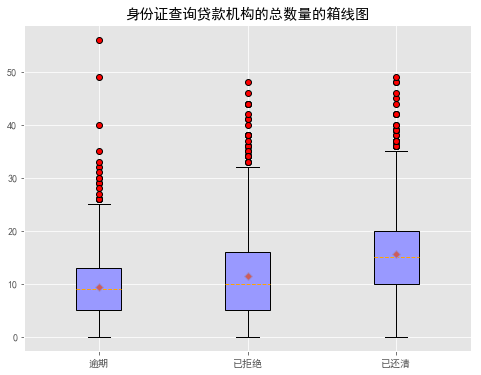

In [83]:
#身份证查询贷款机构的总数量
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
fig=plt.figure(figsize=(8,6))
plt.boxplot(x=[Data['身份证查询贷款机构的总数量'][yq_index],Data['身份证查询贷款机构的总数量'][yjj_index][Data['身份证查询贷款机构的总数量'][yjj_index].notnull()],
               Data['身份证查询贷款机构的总数量'][yhq_index]],
            patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['逾期','已拒绝','已还清'])
plt.title('身份证查询贷款机构的总数量的箱线图')

In [84]:
print(np.mean(Data['身份证查询贷款机构的总数量'][yq_index]))
print(np.mean(Data['身份证查询贷款机构的总数量'][yjj_index][Data['身份证查询贷款机构的总数量'][yjj_index].notnull()]))
print(np.mean(Data['身份证查询贷款机构的总数量'][yhq_index]))

9.359166666666667
11.400700350175088
15.532222222222222


## 七天查询数量

In [85]:
zongshu_idday7_query=Data['身份证7天之内查询贷款机构的数量'][~Data['身份证7天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [86]:
len(zongshu_idday7_query)

3000

In [87]:
Data['申请状态'][Data['身份证7天之内查询贷款机构的数量'][Data['身份证7天之内查询贷款机构的数量'].isnull()].index].value_counts()

已拒绝    1
Name: 申请状态, dtype: int64

In [88]:
1063/2200

0.48318181818181816

In [89]:
print(Data['身份证7天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_idday7_query.value_counts())
print(Data['身份证7天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday7_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_idday7_query.value_counts().index)
df['逾期数']=Data['身份证7天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_idday7_query.value_counts()
df['逾期率']=Data['身份证7天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday7_query.value_counts()
# df.to_excel('身份证7天之内查询贷款机构的数量.xlsx',index=True)

0.0    1063
1.0     108
2.0      21
3.0       6
5.0       1
4.0       1
Name: 身份证7天之内查询贷款机构的数量, dtype: int64
0.0    2200
1.0     527
2.0     155
3.0      66
4.0      36
5.0      11
6.0       4
7.0       1
Name: 身份证7天之内查询贷款机构的数量, dtype: int64
0.0    0.483182
1.0    0.204934
2.0    0.135484
3.0    0.090909
4.0    0.027778
5.0    0.090909
6.0         NaN
7.0         NaN
Name: 身份证7天之内查询贷款机构的数量, dtype: float64


In [91]:
print(Data['身份证7天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['身份证7天之内查询贷款机构的数量'].value_counts())
print(Data['身份证7天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证7天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份证7天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['身份证7天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['身份证7天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['身份证7天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证7天之内查询贷款机构的数量'].value_counts()
df

0.0    1614
1.0     253
2.0      76
3.0      40
4.0      14
7.0       1
5.0       1
Name: 身份证7天之内查询贷款机构的数量, dtype: int64
0.0    3814
1.0     780
2.0     231
3.0     106
4.0      50
5.0      12
6.0       4
7.0       2
Name: 身份证7天之内查询贷款机构的数量, dtype: int64
0.0    0.423178
1.0    0.324359
2.0    0.329004
3.0    0.377358
4.0    0.280000
5.0    0.083333
6.0         NaN
7.0    0.500000
Name: 身份证7天之内查询贷款机构的数量, dtype: float64


,已拒绝数,总数,已拒绝率
0.0,1614,3814,0.423178
1.0,253,780,0.324359
2.0,76,231,0.329004
3.0,40,106,0.377358
4.0,14,50,0.280000
7.0,1,2,0.500000
5.0,1,12,0.083333


## 14天查询数量

In [105]:
zongshu_idday14_query=Data['身份证14天之内查询贷款机构的数量'][~Data['身份证14天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [107]:
Data['申请状态'][Data['身份证14天之内查询贷款机构的数量'][Data['身份证14天之内查询贷款机构的数量'].isnull()].index].value_counts()

已拒绝    1
Name: 申请状态, dtype: int64

In [108]:
print(Data['身份证14天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_idday14_query.value_counts())
print(Data['身份证14天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday14_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_idday14_query.value_counts().index)
df['逾期数']=Data['身份证14天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_idday14_query.value_counts()
df['逾期率']=Data['身份证14天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday14_query.value_counts()
# df.to_excel('身份证14天之内查询贷款机构的数量.xlsx',index=True)

0.0     896
1.0     222
2.0      48
3.0      22
5.0       6
4.0       2
9.0       1
6.0       1
7.0       1
10.0      1
Name: 身份证14天之内查询贷款机构的数量, dtype: int64
0.0     1788
1.0      694
2.0      236
3.0      132
4.0       59
5.0       39
6.0       30
7.0       14
10.0       3
8.0        3
9.0        2
Name: 身份证14天之内查询贷款机构的数量, dtype: int64
0.0     0.501119
1.0     0.319885
2.0     0.203390
3.0     0.166667
4.0     0.033898
5.0     0.153846
6.0     0.033333
7.0     0.071429
8.0          NaN
9.0     0.500000
10.0    0.333333
Name: 身份证14天之内查询贷款机构的数量, dtype: float64


In [112]:
print(Data['身份证14天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['身份证14天之内查询贷款机构的数量'].value_counts())
print(Data['身份证14天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证14天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份证14天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['身份证14天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['身份证14天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['身份证14天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证14天之内查询贷款机构的数量'].value_counts()
df

0.0    1330
1.0     397
2.0     123
3.0      69
4.0      38
5.0      24
6.0       7
7.0       7
8.0       3
9.0       1
Name: 身份证14天之内查询贷款机构的数量, dtype: int64
0.0     3118
1.0     1091
2.0      359
3.0      201
4.0       97
5.0       63
6.0       37
7.0       21
8.0        6
10.0       3
9.0        3
Name: 身份证14天之内查询贷款机构的数量, dtype: int64
0.0     0.426555
1.0     0.363886
2.0     0.342618
3.0     0.343284
4.0     0.391753
5.0     0.380952
6.0     0.189189
7.0     0.333333
8.0     0.500000
9.0     0.333333
10.0         NaN
Name: 身份证14天之内查询贷款机构的数量, dtype: float64


,已拒绝数,总数,已拒绝率
0.0,1330,3118,0.426555
1.0,397,1091,0.363886
2.0,123,359,0.342618
3.0,69,201,0.343284
4.0,38,97,0.391753
5.0,24,63,0.380952
6.0,7,37,0.189189
7.0,7,21,0.333333
8.0,3,6,0.500000
9.0,1,3,0.333333


## 21天查询数量

In [110]:
zongshu_idday21_query=Data['身份证21天之内查询贷款机构的数量'][~Data['身份证21天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [113]:
Data['申请状态'][Data['身份证21天之内查询贷款机构的数量'][Data['身份证21天之内查询贷款机构的数量'].isnull()].index].value_counts()

已拒绝    1
Name: 申请状态, dtype: int64

In [114]:
print(Data['身份证21天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_idday21_query.value_counts())
print(Data['身份证21天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday21_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_idday21_query.value_counts().index)
df['逾期数']=Data['身份证21天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_idday21_query.value_counts()
df['逾期率']=Data['身份证21天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday21_query.value_counts()
# df.to_excel('身份证21天之内查询贷款机构的数量.xlsx',index=True)

0.0     845
1.0     220
2.0      65
3.0      25
5.0      15
4.0      14
6.0       5
9.0       4
7.0       3
8.0       3
10.0      1
Name: 身份证21天之内查询贷款机构的数量, dtype: int64
0.0     1635
1.0      646
2.0      271
3.0      163
4.0       92
5.0       71
6.0       49
7.0       27
8.0       22
9.0       17
10.0       4
13.0       2
11.0       1
Name: 身份证21天之内查询贷款机构的数量, dtype: int64
0.0     0.516820
1.0     0.340557
2.0     0.239852
3.0     0.153374
4.0     0.152174
5.0     0.211268
6.0     0.102041
7.0     0.111111
8.0     0.136364
9.0     0.235294
10.0    0.250000
11.0         NaN
13.0         NaN
Name: 身份证21天之内查询贷款机构的数量, dtype: float64


In [115]:
print(Data['身份证21天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['身份证21天之内查询贷款机构的数量'].value_counts())
print(Data['身份证21天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证21天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份证21天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['身份证21天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['身份证21天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['身份证21天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证21天之内查询贷款机构的数量'].value_counts()
df

0.0     1208
1.0      415
2.0      141
3.0       94
4.0       43
5.0       33
6.0       23
7.0       17
9.0        9
10.0       7
8.0        6
11.0       3
Name: 身份证21天之内查询贷款机构的数量, dtype: int64
0.0     2843
1.0     1061
2.0      412
3.0      257
4.0      135
5.0      104
6.0       72
7.0       44
8.0       28
9.0       26
10.0      11
11.0       4
13.0       2
Name: 身份证21天之内查询贷款机构的数量, dtype: int64
0.0     0.424903
1.0     0.391140
2.0     0.342233
3.0     0.365759
4.0     0.318519
5.0     0.317308
6.0     0.319444
7.0     0.386364
8.0     0.214286
9.0     0.346154
10.0    0.636364
11.0    0.750000
13.0         NaN
Name: 身份证21天之内查询贷款机构的数量, dtype: float64


,已拒绝数,总数,已拒绝率
0.0,1208,2843,0.424903
1.0,415,1061,0.391140
2.0,141,412,0.342233
3.0,94,257,0.365759
4.0,43,135,0.318519
5.0,33,104,0.317308
6.0,23,72,0.319444
7.0,17,44,0.386364
9.0,9,26,0.346154
10.0,7,11,0.636364


## 30天查询数量

In [116]:
zongshu_idday30_query=Data['身份证30天之内查询贷款机构的数量'][~Data['身份证30天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [117]:
Data['申请状态'][Data['身份证30天之内查询贷款机构的数量'][Data['身份证30天之内查询贷款机构的数量'].isnull()].index].value_counts()

已拒绝    1
Name: 申请状态, dtype: int64

In [118]:
print(Data['身份证30天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_idday30_query.value_counts())
print(Data['身份证30天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday30_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_idday30_query.value_counts().index)
df['逾期数']=Data['身份证30天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_idday30_query.value_counts()
df['逾期率']=Data['身份证30天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday30_query.value_counts()
# df.to_excel('身份证30天之内查询贷款机构的数量.xlsx',index=True)

0.0     765
1.0     228
2.0      81
3.0      51
5.0      25
4.0      15
6.0      12
9.0       6
11.0      5
7.0       4
8.0       3
10.0      3
13.0      1
14.0      1
Name: 身份证30天之内查询贷款机构的数量, dtype: int64
0.0     1434
1.0      631
2.0      270
3.0      189
4.0      139
5.0      104
6.0       65
9.0       45
8.0       42
7.0       39
10.0      16
11.0      11
13.0       5
14.0       5
12.0       4
15.0       1
Name: 身份证30天之内查询贷款机构的数量, dtype: int64
0.0     0.533473
1.0     0.361331
2.0     0.300000
3.0     0.269841
4.0     0.107914
5.0     0.240385
6.0     0.184615
7.0     0.102564
8.0     0.071429
9.0     0.133333
10.0    0.187500
11.0    0.454545
12.0         NaN
13.0    0.200000
14.0    0.200000
15.0         NaN
Name: 身份证30天之内查询贷款机构的数量, dtype: float64


In [119]:
print(Data['身份证30天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['身份证30天之内查询贷款机构的数量'].value_counts())
print(Data['身份证30天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证30天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份证30天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['身份证30天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['身份证30天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['身份证30天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证30天之内查询贷款机构的数量'].value_counts()
df

0.0     1082
1.0      415
2.0      166
3.0      103
4.0       61
5.0       54
6.0       31
7.0       23
8.0       20
9.0       15
10.0      13
13.0       5
11.0       5
12.0       3
14.0       1
17.0       1
16.0       1
Name: 身份证30天之内查询贷款机构的数量, dtype: int64
0.0     2516
1.0     1046
2.0      436
3.0      292
4.0      200
5.0      158
6.0       96
7.0       62
8.0       62
9.0       60
10.0      29
11.0      16
13.0      10
12.0       7
14.0       6
16.0       1
15.0       1
17.0       1
Name: 身份证30天之内查询贷款机构的数量, dtype: int64
0.0     0.430048
1.0     0.396750
2.0     0.380734
3.0     0.352740
4.0     0.305000
5.0     0.341772
6.0     0.322917
7.0     0.370968
8.0     0.322581
9.0     0.250000
10.0    0.448276
11.0    0.312500
12.0    0.428571
13.0    0.500000
14.0    0.166667
15.0         NaN
16.0    1.000000
17.0    1.000000
Name: 身份证30天之内查询贷款机构的数量, dtype: float64


,已拒绝数,总数,已拒绝率
0.0,1082,2516,0.430048
1.0,415,1046,0.396750
2.0,166,436,0.380734
3.0,103,292,0.352740
4.0,61,200,0.305000
5.0,54,158,0.341772
6.0,31,96,0.322917
7.0,23,62,0.370968
8.0,20,62,0.322581
9.0,15,60,0.250000


## 60天查询数量

In [121]:
zongshu_idday60_query=Data['身份证60天之内查询贷款机构的数量'][~Data['身份证60天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [122]:
Data['申请状态'][Data['身份证60天之内查询贷款机构的数量'][Data['身份证60天之内查询贷款机构的数量'].isnull()].index].value_counts()

已拒绝    1
Name: 申请状态, dtype: int64

In [123]:
print(Data['身份证60天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_idday60_query.value_counts())
print(Data['身份证60天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday60_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_idday60_query.value_counts().index)
df['逾期数']=Data['身份证60天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_idday60_query.value_counts()
df['逾期率']=Data['身份证60天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday60_query.value_counts()
# df.to_excel('身份证60天之内查询贷款机构的数量.xlsx',index=True)

0.0     505
1.0     220
2.0     111
3.0      90
4.0      61
5.0      45
6.0      38
9.0      29
7.0      26
8.0      21
10.0     11
11.0     11
13.0      9
12.0      8
14.0      4
16.0      3
15.0      2
17.0      2
18.0      2
19.0      1
22.0      1
Name: 身份证60天之内查询贷款机构的数量, dtype: int64
0.0     896
1.0     486
2.0     295
3.0     226
4.0     196
5.0     156
6.0     133
7.0     106
9.0      95
8.0      91
10.0     63
11.0     51
12.0     46
13.0     45
14.0     33
15.0     23
17.0     14
16.0     11
18.0     10
22.0      7
21.0      6
19.0      6
20.0      2
29.0      1
25.0      1
33.0      1
Name: 身份证60天之内查询贷款机构的数量, dtype: int64
0.0     0.563616
1.0     0.452675
2.0     0.376271
3.0     0.398230
4.0     0.311224
5.0     0.288462
6.0     0.285714
7.0     0.245283
8.0     0.230769
9.0     0.305263
10.0    0.174603
11.0    0.215686
12.0    0.173913
13.0    0.200000
14.0    0.121212
15.0    0.086957
16.0    0.272727
17.0    0.142857
18.0    0.200000
19.0    0.166667
20.0         NaN
21.

In [124]:
print(Data['身份证60天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['身份证60天之内查询贷款机构的数量'].value_counts())
print(Data['身份证60天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证60天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份证60天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['身份证60天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['身份证60天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['身份证60天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证60天之内查询贷款机构的数量'].value_counts()
df

0.0     683
1.0     341
2.0     201
3.0     144
4.0     135
5.0     106
6.0      79
7.0      49
10.0     46
8.0      44
9.0      36
12.0     26
11.0     26
15.0     17
13.0     15
16.0     12
14.0     10
19.0      9
17.0      8
20.0      3
18.0      3
21.0      3
26.0      1
24.0      1
23.0      1
Name: 身份证60天之内查询贷款机构的数量, dtype: int64
0.0     1579
1.0      827
2.0      496
3.0      370
4.0      331
5.0      262
6.0      212
7.0      155
8.0      135
9.0      131
10.0     109
11.0      77
12.0      72
13.0      60
14.0      43
15.0      40
16.0      23
17.0      22
19.0      15
18.0      13
21.0       9
22.0       7
20.0       5
29.0       1
24.0       1
26.0       1
33.0       1
25.0       1
23.0       1
Name: 身份证60天之内查询贷款机构的数量, dtype: int64
0.0     0.432552
1.0     0.412334
2.0     0.405242
3.0     0.389189
4.0     0.407855
5.0     0.404580
6.0     0.372642
7.0     0.316129
8.0     0.325926
9.0     0.274809
10.0    0.422018
11.0    0.337662
12.0    0.361111
13.0    0.250000
14.0    0

,已拒绝数,总数,已拒绝率
0.0,683,1579,0.432552
1.0,341,827,0.412334
2.0,201,496,0.405242
3.0,144,370,0.389189
4.0,135,331,0.407855
5.0,106,262,0.404580
6.0,79,212,0.372642
7.0,49,155,0.316129
10.0,46,109,0.422018
8.0,44,135,0.325926


## 90天查询数量

In [125]:
zongshu_idday90_query=Data['身份证90天之内查询贷款机构的数量'][~Data['身份证90天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [126]:
Data['申请状态'][Data['身份证90天之内查询贷款机构的数量'][Data['身份证90天之内查询贷款机构的数量'].isnull()].index].value_counts()

已拒绝    1
Name: 申请状态, dtype: int64

In [127]:
print(Data['身份证90天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_idday90_query.value_counts())
print(Data['身份证90天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday90_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_idday90_query.value_counts().index)
df['逾期数']=Data['身份证90天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_idday90_query.value_counts()
df['逾期率']=Data['身份证90天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_idday90_query.value_counts()
# df.to_excel('身份证90天之内查询贷款机构的数量.xlsx',index=True)

0.0     267
1.0     183
2.0     128
3.0     105
4.0      92
5.0      77
7.0      67
6.0      64
8.0      43
10.0     36
9.0      36
11.0     17
12.0     16
13.0     13
15.0     11
14.0     11
16.0      9
17.0      6
19.0      5
18.0      5
20.0      2
22.0      2
21.0      2
28.0      1
26.0      1
30.0      1
Name: 身份证90天之内查询贷款机构的数量, dtype: int64
0.0     445
1.0     377
2.0     254
3.0     221
4.0     211
5.0     201
6.0     177
7.0     171
9.0     142
10.0    114
8.0     112
11.0     88
12.0     77
13.0     64
14.0     56
15.0     47
16.0     43
17.0     42
18.0     38
19.0     30
21.0     21
20.0     16
22.0     13
23.0      9
24.0      7
26.0      6
27.0      5
29.0      4
25.0      3
28.0      3
30.0      2
33.0      1
Name: 身份证90天之内查询贷款机构的数量, dtype: int64
0.0     0.600000
1.0     0.485411
2.0     0.503937
3.0     0.475113
4.0     0.436019
5.0     0.383085
6.0     0.361582
7.0     0.391813
8.0     0.383929
9.0     0.253521
10.0    0.315789
11.0    0.193182
12.0    0.207792
13.0   

In [128]:
print(Data['身份证90天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['身份证90天之内查询贷款机构的数量'].value_counts())
print(Data['身份证90天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证90天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['身份证90天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['身份证90天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['身份证90天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['身份证90天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['身份证90天之内查询贷款机构的数量'].value_counts()
df

0.0     438
1.0     251
2.0     203
3.0     154
4.0     135
6.0     118
5.0     116
7.0      85
9.0      76
8.0      74
10.0     70
11.0     46
13.0     42
12.0     40
14.0     28
15.0     23
16.0     18
18.0     14
17.0     13
19.0     13
21.0     11
20.0      8
22.0      4
26.0      4
23.0      3
29.0      3
24.0      3
27.0      2
25.0      2
32.0      1
34.0      1
Name: 身份证90天之内查询贷款机构的数量, dtype: int64
0.0     883
1.0     628
2.0     457
3.0     375
4.0     346
5.0     317
6.0     295
7.0     256
9.0     218
8.0     186
10.0    184
11.0    134
12.0    117
13.0    106
14.0     84
15.0     70
16.0     61
17.0     55
18.0     52
19.0     43
21.0     32
20.0     24
22.0     17
23.0     12
24.0     10
26.0     10
27.0      7
29.0      7
25.0      5
28.0      3
30.0      2
32.0      1
33.0      1
34.0      1
Name: 身份证90天之内查询贷款机构的数量, dtype: int64
0.0     0.496036
1.0     0.399682
2.0     0.444201
3.0     0.410667
4.0     0.390173
5.0     0.365931
6.0     0.400000
7.0     0.332031
8.0     

,已拒绝数,总数,已拒绝率
0.0,438,883,0.496036
1.0,251,628,0.399682
2.0,203,457,0.444201
3.0,154,375,0.410667
4.0,135,346,0.390173
6.0,118,295,0.400000
5.0,116,317,0.365931
7.0,85,256,0.332031
9.0,76,218,0.348624
8.0,74,186,0.397849


# 号码查询贷款机构的总数量

## 总数量

In [92]:
zongshu_number_query=Data['号码查询贷款机构的总数量'][~Data['号码查询贷款机构的总数量'].index.isin(yjj_index)].reset_index(drop = True)

In [93]:
len(zongshu_number_query)

3000

In [94]:
Data['申请状态'][Data['号码查询贷款机构的总数量'][Data['号码查询贷款机构的总数量'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [96]:
print(Data['号码查询贷款机构的总数量'][yq_index].value_counts())
print(zongshu_number_query.value_counts())
print(Data['号码查询贷款机构的总数量'][yq_index].value_counts()/zongshu_number_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_number_query.value_counts().index)
df['逾期数']=Data['号码查询贷款机构的总数量'][yq_index].value_counts()
df['总数']=zongshu_number_query.value_counts()
df['逾期率']=Data['号码查询贷款机构的总数量'][yq_index].value_counts()/zongshu_number_query.value_counts()
# df.to_excel('号码查询贷款机构的总数量.xlsx',index=True)

3     133
1     124
2     113
0     110
6     101
5      94
4      88
7      83
8      63
9      61
10     47
11     35
13     23
14     22
12     21
16     16
17     13
19     10
18     10
15      7
21      6
20      4
23      3
28      3
22      2
25      2
26      2
46      1
24      1
35      1
51      1
Name: 号码查询贷款机构的总数量, dtype: int64
6     193
3     181
7     168
5     163
2     159
1     159
9     158
4     156
8     150
10    146
0     144
11    144
12    127
13    109
16    105
14     90
17     77
18     70
15     68
19     55
22     47
21     45
20     42
23     35
24     24
26     24
25     23
27     23
28     18
29     16
30     15
31     10
36      8
35      8
34      7
33      7
32      6
38      3
39      3
42      3
40      2
46      2
37      2
51      1
45      1
52      1
41      1
50      1
Name: 号码查询贷款机构的总数量, dtype: int64
0     0.763889
1     0.779874
2     0.710692
3     0.734807
4     0.564103
5     0.576687
6     0.523316
7     0.494048
8     0.420000
9     0.3

In [95]:
print(Data['号码查询贷款机构的总数量'][yjj_index].value_counts())
print(Data['号码查询贷款机构的总数量'].value_counts())
print(Data['号码查询贷款机构的总数量'][yjj_index].value_counts()/Data['号码查询贷款机构的总数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码查询贷款机构的总数量'].value_counts().index)
df['已拒绝数']=Data['号码查询贷款机构的总数量'][yjj_index].value_counts()
df['总数']=Data['号码查询贷款机构的总数量'].value_counts()
df['已拒绝率']=Data['号码查询贷款机构的总数量'][yjj_index].value_counts()/Data['号码查询贷款机构的总数量'].value_counts()
df

0     169
2     166
1     146
4     142
3     138
6     128
7     119
5     119
8      94
9      90
10     80
11     79
12     72
13     66
15     52
14     44
17     43
16     39
18     32
19     26
22     21
20     20
24     16
26     14
23     13
25     13
21     12
27      8
31      6
29      6
28      6
35      6
30      3
32      3
36      2
33      2
39      2
43      1
34      1
44      1
Name: 号码查询贷款机构的总数量, dtype: int64
2     325
6     321
3     319
0     313
1     305
4     298
7     287
5     282
9     248
8     244
10    226
11    223
12    199
13    175
16    144
14    134
15    120
17    120
18    102
19     81
22     68
20     62
21     57
23     48
24     40
26     38
25     36
27     31
28     24
29     22
30     18
31     16
35     14
36     10
33      9
32      9
34      8
39      5
42      3
38      3
37      2
46      2
40      2
51      1
44      1
52      1
41      1
43      1
50      1
45      1
Name: 号码查询贷款机构的总数量, dtype: int64
0     0.539936
1     0.478689
2   

,已拒绝数,总数,已拒绝率
0,169,313,0.539936
2,166,325,0.510769
1,146,305,0.478689
4,142,298,0.476510
3,138,319,0.432602
6,128,321,0.398754
7,119,287,0.414634
5,119,282,0.421986
8,94,244,0.385246
9,90,248,0.362903


## 号码7天之内查询贷款机构的数量

In [129]:
zongshu_number7day_query=Data['号码7天之内查询贷款机构的数量'][~Data['号码7天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [130]:
Data['申请状态'][Data['号码7天之内查询贷款机构的数量'][Data['号码7天之内查询贷款机构的数量'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [132]:
print(Data['号码7天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_number7day_query.value_counts())
print(Data['号码7天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number7day_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_number7day_query.value_counts().index)
df['逾期数']=Data['号码7天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_number7day_query.value_counts()
df['逾期率']=Data['号码7天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number7day_query.value_counts()
# df.to_excel('号码7天之内查询贷款机构的数量.xlsx',index=True)

0    1067
1     114
2      14
3       4
5       1
Name: 号码7天之内查询贷款机构的数量, dtype: int64
0    2215
1     555
2     164
3      45
4      20
5       1
Name: 号码7天之内查询贷款机构的数量, dtype: int64
0    0.481716
1    0.205405
2    0.085366
3    0.088889
4         NaN
5    1.000000
Name: 号码7天之内查询贷款机构的数量, dtype: float64


In [133]:
print(Data['号码7天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['号码7天之内查询贷款机构的数量'].value_counts())
print(Data['号码7天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码7天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码7天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['号码7天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['号码7天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['号码7天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码7天之内查询贷款机构的数量'].value_counts()
df

0    1626
1     258
2      89
3      22
4       5
Name: 号码7天之内查询贷款机构的数量, dtype: int64
0    3841
1     813
2     253
3      67
4      25
5       1
Name: 号码7天之内查询贷款机构的数量, dtype: int64
0    0.423327
1    0.317343
2    0.351779
3    0.328358
4    0.200000
5         NaN
Name: 号码7天之内查询贷款机构的数量, dtype: float64


,已拒绝数,总数,已拒绝率
0,1626,3841,0.423327
1,258,813,0.317343
2,89,253,0.351779
3,22,67,0.328358
4,5,25,0.200000


## 号码14天之内查询贷款机构的数量

In [134]:
zongshu_number14day_query=Data['号码14天之内查询贷款机构的数量'][~Data['号码14天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [135]:
Data['申请状态'][Data['号码14天之内查询贷款机构的数量'][Data['号码14天之内查询贷款机构的数量'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [136]:
print(Data['号码14天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_number14day_query.value_counts())
print(Data['号码14天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number14day_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_number14day_query.value_counts().index)
df['逾期数']=Data['号码14天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_number14day_query.value_counts()
df['逾期率']=Data['号码14天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number14day_query.value_counts()
# df.to_excel('号码14天之内查询贷款机构的数量.xlsx',index=True)

0     841
1     267
2      61
4      14
3      13
5       2
10      1
7       1
Name: 号码14天之内查询贷款机构的数量, dtype: int64
0     1675
1      743
2      278
3      130
4       80
5       48
6       23
7       19
8        3
10       1
Name: 号码14天之内查询贷款机构的数量, dtype: int64
0     0.502090
1     0.359354
2     0.219424
3     0.100000
4     0.175000
5     0.041667
6          NaN
7     0.052632
8          NaN
10    1.000000
Name: 号码14天之内查询贷款机构的数量, dtype: float64


In [137]:
print(Data['号码14天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['号码14天之内查询贷款机构的数量'].value_counts())
print(Data['号码14天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码14天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码14天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['号码14天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['号码14天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['号码14天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码14天之内查询贷款机构的数量'].value_counts()
df

0    1269
1     436
2     146
3      73
4      34
5      27
6      10
7       3
8       2
Name: 号码14天之内查询贷款机构的数量, dtype: int64
0     2944
1     1179
2      424
3      203
4      114
5       75
6       33
7       22
8        5
10       1
Name: 号码14天之内查询贷款机构的数量, dtype: int64
0     0.431046
1     0.369805
2     0.344340
3     0.359606
4     0.298246
5     0.360000
6     0.303030
7     0.136364
8     0.400000
10         NaN
Name: 号码14天之内查询贷款机构的数量, dtype: float64


,已拒绝数,总数,已拒绝率
0,1269,2944,0.431046
1,436,1179,0.369805
2,146,424,0.344340
3,73,203,0.359606
4,34,114,0.298246
5,27,75,0.360000
6,10,33,0.303030
7,3,22,0.136364
8,2,5,0.400000


##  号码21天之内查询贷款机构的数量

In [95]:
zongshu_number21day_query=Data['号码21天之内查询贷款机构的数量'][~Data['号码21天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [96]:
Data['申请状态'][Data['号码21天之内查询贷款机构的数量'][Data['号码21天之内查询贷款机构的数量'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [97]:
print(Data['号码21天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_number21day_query.value_counts())
print(Data['号码21天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number21day_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_number21day_query.value_counts().index)
df['逾期数']=Data['号码21天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_number21day_query.value_counts()
df['逾期率']=Data['号码21天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number21day_query.value_counts()
# df.to_excel('号码21天之内查询贷款机构的数量.xlsx',index=True)

0     779
1     239
2      98
3      35
4      22
5      13
6       7
7       4
8       2
13      1
Name: 号码21天之内查询贷款机构的数量, dtype: int64
0     1484
1      638
2      335
3      173
4      117
5       84
6       72
7       38
8       16
9       15
10      13
12       7
11       6
13       2
Name: 号码21天之内查询贷款机构的数量, dtype: int64
0     0.524933
1     0.374608
2     0.292537
3     0.202312
4     0.188034
5     0.154762
6     0.097222
7     0.105263
8     0.125000
9          NaN
10         NaN
11         NaN
12         NaN
13    0.500000
Name: 号码21天之内查询贷款机构的数量, dtype: float64


In [98]:
print(Data['号码21天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['号码21天之内查询贷款机构的数量'].value_counts())
print(Data['号码21天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码21天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码21天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['号码21天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['号码21天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['号码21天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码21天之内查询贷款机构的数量'].value_counts()
df

0     1123
1      419
2      181
3      103
4       53
5       47
6       36
8       14
7       13
9        5
11       3
10       2
12       1
Name: 号码21天之内查询贷款机构的数量, dtype: int64
0     2607
1     1057
2      516
3      276
4      170
5      131
6      108
7       51
8       30
9       20
10      15
11       9
12       8
13       2
Name: 号码21天之内查询贷款机构的数量, dtype: int64
0     0.430763
1     0.396405
2     0.350775
3     0.373188
4     0.311765
5     0.358779
6     0.333333
7     0.254902
8     0.466667
9     0.250000
10    0.133333
11    0.333333
12    0.125000
13         NaN
Name: 号码21天之内查询贷款机构的数量, dtype: float64


,已拒绝数,总数,已拒绝率
0,1123,2607,0.430763
1,419,1057,0.396405
2,181,516,0.350775
3,103,276,0.373188
4,53,170,0.311765
5,47,131,0.358779
6,36,108,0.333333
8,14,30,0.466667
7,13,51,0.254902
9,5,20,0.250000


## 号码30天之内查询贷款机构的数量

In [99]:
zongshu_number30day_query=Data['号码30天之内查询贷款机构的数量'][~Data['号码30天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [100]:
Data['申请状态'][Data['号码30天之内查询贷款机构的数量'][Data['号码30天之内查询贷款机构的数量'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [101]:
print(Data['号码30天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_number30day_query.value_counts())
print(Data['号码30天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number30day_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_number30day_query.value_counts().index)
df['逾期数']=Data['号码30天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_number30day_query.value_counts()
df['逾期率']=Data['号码30天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number30day_query.value_counts()
# df.to_excel('号码30天之内查询贷款机构的数量.xlsx',index=True)

0     694
1     239
2     118
3      53
4      28
5      23
6      15
7      11
8       8
10      4
9       4
11      2
18      1
Name: 号码30天之内查询贷款机构的数量, dtype: int64
0     1295
1      596
2      339
3      194
5      118
4      117
6       84
8       63
7       57
9       36
10      34
11      23
14      14
12      10
13       7
15       5
17       4
16       3
18       1
Name: 号码30天之内查询贷款机构的数量, dtype: int64
0     0.535907
1     0.401007
2     0.348083
3     0.273196
4     0.239316
5     0.194915
6     0.178571
7     0.192982
8     0.126984
9     0.111111
10    0.117647
11    0.086957
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18    1.000000
Name: 号码30天之内查询贷款机构的数量, dtype: float64


In [104]:
print(Data['号码30天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['号码30天之内查询贷款机构的数量'].value_counts())
print(Data['号码30天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码30天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码30天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['号码30天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['号码30天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['号码30天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码30天之内查询贷款机构的数量'].value_counts()
df

0     978
1     413
2     194
3     121
5      65
4      62
6      42
7      38
8      35
9      17
10     16
12      6
13      5
11      4
15      2
14      2
Name: 号码30天之内查询贷款机构的数量, dtype: int64
0     2273
1     1009
2      533
3      315
5      183
4      179
6      126
8       98
7       95
9       53
10      50
11      27
12      16
14      16
13      12
15       7
17       4
16       3
18       1
Name: 号码30天之内查询贷款机构的数量, dtype: int64
0     0.430268
1     0.409316
2     0.363977
3     0.384127
4     0.346369
5     0.355191
6     0.333333
7     0.400000
8     0.357143
9     0.320755
10    0.320000
11    0.148148
12    0.375000
13    0.416667
14    0.125000
15    0.285714
16         NaN
17         NaN
18         NaN
Name: 号码30天之内查询贷款机构的数量, dtype: float64


,已拒绝数,总数,已拒绝率
0,978,2273,0.430268
1,413,1009,0.409316
2,194,533,0.363977
3,121,315,0.384127
5,65,183,0.355191
4,62,179,0.346369
6,42,126,0.333333
7,38,95,0.400000
8,35,98,0.357143
9,17,53,0.320755


## 号码60天之内查询贷款机构的数量

In [105]:
zongshu_number60day_query=Data['号码60天之内查询贷款机构的数量'][~Data['号码60天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [106]:
Data['申请状态'][Data['号码60天之内查询贷款机构的数量'][Data['号码60天之内查询贷款机构的数量'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [107]:
print(Data['号码60天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_number60day_query.value_counts())
print(Data['号码60天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number60day_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_number60day_query.value_counts().index)
df['逾期数']=Data['号码60天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_number60day_query.value_counts()
df['逾期率']=Data['号码60天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number60day_query.value_counts()
# df.to_excel('号码60天之内查询贷款机构的数量.xlsx',index=True)

0     513
1     210
2     126
3      80
5      51
4      50
6      45
7      29
8      22
9      16
10     16
15      8
12      8
11      7
13      6
16      4
14      2
17      2
24      1
18      1
19      1
23      1
25      1
Name: 号码60天之内查询贷款机构的数量, dtype: int64
0     869
1     455
2     342
3     204
4     164
5     133
6     124
7     113
8      94
10     71
9      69
11     59
12     53
13     41
14     36
16     33
15     30
17     28
18     15
19     13
22     12
20     10
21      8
26      5
23      5
28      4
25      3
27      3
24      2
30      2
Name: 号码60天之内查询贷款机构的数量, dtype: int64
0     0.590334
1     0.461538
2     0.368421
3     0.392157
4     0.304878
5     0.383459
6     0.362903
7     0.256637
8     0.234043
9     0.231884
10    0.225352
11    0.118644
12    0.150943
13    0.146341
14    0.055556
15    0.266667
16    0.121212
17    0.071429
18    0.066667
19    0.076923
20         NaN
21         NaN
22         NaN
23    0.200000
24    0.500000
25    0.333333
26    

In [108]:
print(Data['号码60天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['号码60天之内查询贷款机构的数量'].value_counts())
print(Data['号码60天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码60天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码60天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['号码60天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['号码60天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['号码60天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码60天之内查询贷款机构的数量'].value_counts()
df

0     671
1     302
2     210
3     158
4     110
5     100
6      78
7      67
8      50
10     42
9      39
11     30
12     24
13     21
14     20
16     19
15     15
17     12
19      6
21      6
23      6
18      5
22      3
20      2
24      2
25      1
26      1
Name: 号码60天之内查询贷款机构的数量, dtype: int64
0     1540
1      757
2      552
3      362
4      274
5      233
6      202
7      180
8      144
10     113
9      108
11      89
12      77
13      62
14      56
16      52
15      45
17      40
18      20
19      19
22      15
21      14
20      12
23      11
26       6
25       4
24       4
28       4
27       3
30       2
Name: 号码60天之内查询贷款机构的数量, dtype: int64
0     0.435714
1     0.398943
2     0.380435
3     0.436464
4     0.401460
5     0.429185
6     0.386139
7     0.372222
8     0.347222
9     0.361111
10    0.371681
11    0.337079
12    0.311688
13    0.338710
14    0.357143
15    0.333333
16    0.365385
17    0.300000
18    0.250000
19    0.315789
20    0.166667
21    0.428

,已拒绝数,总数,已拒绝率
0,671,1540,0.435714
1,302,757,0.398943
2,210,552,0.380435
3,158,362,0.436464
4,110,274,0.401460
5,100,233,0.429185
6,78,202,0.386139
7,67,180,0.372222
8,50,144,0.347222
10,42,113,0.371681


## 号码90天之内查询贷款机构的数量

In [109]:
zongshu_number90day_query=Data['号码90天之内查询贷款机构的数量'][~Data['号码90天之内查询贷款机构的数量'].index.isin(yjj_index)].reset_index(drop = True)

In [110]:
Data['申请状态'][Data['号码90天之内查询贷款机构的数量'][Data['号码90天之内查询贷款机构的数量'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [113]:
print(Data['号码90天之内查询贷款机构的数量'][yq_index].value_counts())
print(zongshu_number90day_query.value_counts())
print(Data['号码90天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number90day_query.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_number90day_query.value_counts().index)
df['逾期数']=Data['号码90天之内查询贷款机构的数量'][yq_index].value_counts()
df['总数']=zongshu_number90day_query.value_counts()
df['逾期率']=Data['号码90天之内查询贷款机构的数量'][yq_index].value_counts()/zongshu_number90day_query.value_counts()
# df.to_excel('号码90天之内查询贷款机构的数量.xlsx',index=True)

0     336
1     200
2     137
3     107
4      85
6      66
7      59
5      58
8      29
9      24
10     21
12     15
11     13
16     10
13      8
18      7
17      6
15      5
14      4
19      2
28      1
20      1
21      1
23      1
25      1
26      1
27      1
31      1
Name: 号码90天之内查询贷款机构的数量, dtype: int64
0     534
1     357
2     284
3     237
4     190
5     170
6     163
7     158
8     121
9     101
10     88
11     83
12     67
13     60
14     60
15     42
16     39
18     38
19     38
17     34
20     24
21     20
22     14
23     12
27     11
24     10
25      9
26      9
28      9
29      5
32      4
33      3
36      3
31      2
30      1
Name: 号码90天之内查询贷款机构的数量, dtype: int64
0     0.629213
1     0.560224
2     0.482394
3     0.451477
4     0.447368
5     0.341176
6     0.404908
7     0.373418
8     0.239669
9     0.237624
10    0.238636
11    0.156627
12    0.223881
13    0.133333
14    0.066667
15    0.119048
16    0.256410
17    0.176471
18    0.184211
19    0.052

In [112]:
print(Data['号码90天之内查询贷款机构的数量'][yjj_index].value_counts())
print(Data['号码90天之内查询贷款机构的数量'].value_counts())
print(Data['号码90天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码90天之内查询贷款机构的数量'].value_counts())
df=pd.DataFrame()
df.reindex(Data['号码90天之内查询贷款机构的数量'].value_counts().index)
df['已拒绝数']=Data['号码90天之内查询贷款机构的数量'][yjj_index].value_counts()
df['总数']=Data['号码90天之内查询贷款机构的数量'].value_counts()
df['已拒绝率']=Data['号码90天之内查询贷款机构的数量'][yjj_index].value_counts()/Data['号码90天之内查询贷款机构的数量'].value_counts()
df

0     491
1     253
2     206
3     157
4     127
5     120
6      98
7      88
8      80
11     50
9      47
10     45
12     43
13     28
14     27
16     23
15     20
17     19
19     17
18     11
22     11
21     10
23      7
26      6
20      4
24      3
27      3
31      2
25      2
28      1
34      1
Name: 号码90天之内查询贷款机构的数量, dtype: int64
0     1025
1      610
2      490
3      394
4      317
5      290
6      261
7      246
8      201
9      148
10     133
11     133
12     110
13      88
14      87
16      62
15      62
19      55
17      53
18      49
21      30
20      28
22      25
23      19
26      15
27      14
24      13
25      11
28      10
29       5
32       4
31       4
36       3
33       3
30       1
34       1
Name: 号码90天之内查询贷款机构的数量, dtype: int64
0     0.479024
1     0.414754
2     0.420408
3     0.398477
4     0.400631
5     0.413793
6     0.375479
7     0.357724
8     0.398010
9     0.317568
10    0.338346
11    0.375940
12    0.390909
13    0.318182
14    0.31

,已拒绝数,总数,已拒绝率
0,491,1025,0.479024
1,253,610,0.414754
2,206,490,0.420408
3,157,394,0.398477
4,127,317,0.400631
5,120,290,0.413793
6,98,261,0.375479
7,88,246,0.357724
8,80,201,0.398010
11,50,133,0.375940


# 通过多条规则筛选

In [4]:
Data.drop(Data['身份证'][Data.duplicated('身份证',keep='last')].index,inplace=True)
Data=Data.reset_index(drop=True)
Data.shape

(4847, 50)

In [5]:
Data=Data.fillna('空值')

In [6]:
Data['申请状态'].value_counts()

已拒绝    1947
已还清    1704
逾期     1196
Name: 申请状态, dtype: int64

In [7]:
(915+1615+1583)/4847

0.8485661233752837

In [8]:
INDEX_shiming=Data['实名认证'][Data['实名认证'].isin(['NOT_MATCH','NOT_FOUND'])].index
Data['身份认证_性别'][INDEX_shiming].value_counts()

PEREMPUAN    1325
LAKI-LAKI    1325
空值            277
Name: 身份认证_性别, dtype: int64

In [9]:
len(INDEX_shiming)

2927

## izidata

In [11]:
index_whatsapp=Data['whatsapp是否开通'][Data['whatsapp是否开通']=='yes'].index
data1=Data.iloc[index_whatsapp,:] #3974
times1=data1['申请状态'].value_counts()
print('times1逾期率：',times1['逾期']/(times1['逾期']+times1['已还清']))

index_number30days_query=data1['号码30天之内查询贷款机构的数量'][data1['号码30天之内查询贷款机构的数量']>=1].index
data2=Data.iloc[index_number30days_query,:]#2320
times2=data2['申请状态'].value_counts()
print('times2逾期率：',times2['逾期']/(times2['逾期']+times2['已还清']))

index_numbersum_query=data2['号码查询贷款机构的总数量'][data2['号码查询贷款机构的总数量']>=2].index
data3=Data.iloc[index_numbersum_query,:] #2293
times3=data3['申请状态'].value_counts()
print('times3逾期率：',times3['逾期']/(times3['逾期']+times3['已还清']))

index_hmsc=data3['号码时长状态'][data3['号码时长状态']=='OK'].index
data4=Data.iloc[index_hmsc,:]#2205
times4=data4['申请状态'].value_counts()
print('times4逾期率：',times4['逾期']/(times4['逾期']+times4['已还清']))

index_hmzwsc=data4['号码在网时长'][data4['号码在网时长'].isin(['12month+','6-8month','8-10month','10-12month'])].index
data5=Data.iloc[index_hmzwsc,:]#1660
times5=data5['申请状态'].value_counts()
print('times5逾期率：',times5['逾期']/(times5['逾期']+times5['已还清']))

index_zjxy=data5['身份认证_宗教信仰'][data5['身份认证_宗教信仰']!='空值'].index
data6=Data.iloc[index_zjxy,:]#1583
times6=data6['申请状态'].value_counts()
print('times6逾期率：',times6['逾期']/(times6['逾期']+times6['已还清']))

index_id30days_query=data6['身份证30天之内查询贷款机构的数量'][data6['身份证30天之内查询贷款机构的数量']>=0].index
data7=Data.iloc[index_id30days_query,:]#1314
times7=data7['申请状态'].value_counts()
print('times7逾期率：',times7['逾期']/(times7['逾期']+times7['已还清']))

index_id_name_match=data7['身份证和姓名是否匹配'][data7['身份证和姓名是否匹配']=='OK'].index
data8=Data.iloc[index_id_name_match]#1263
times8=data8['申请状态'].value_counts()
print('times8逾期率：',times8['逾期']/(times8['逾期']+times8['已还清']))

index_smrz=data8['实名认证'][data8['实名认证'].isin(['NOT_FOUND'])].index
data9=Data.iloc[index_smrz]#780
times9=data9['申请状态'].value_counts()
print('times9逾期率：',times9['逾期']/(times9['逾期']+times9['已还清']))

index_marriage=data9['身份认证_婚姻状况'][~data9['身份认证_婚姻状况'].isin(['空值'])].index
data10=Data.iloc[index_marriage]
times10=data10['申请状态'].value_counts()
print('times10逾期率：',times10['逾期']/(times10['逾期']+times10['已还清']))

# index_occupy=data10['身份认证_职业'][~data10['身份认证_职业'].isin(['空值','BELUM/TIDAK BEKERJA'])].index
# data11=Data.iloc[index_occupy]
# times11=data11['申请状态'].value_counts() 
# print('times11逾期率：',times11['逾期']/(times11['逾期']+times11['已还清']))

index_idsum_query=data10['身份证查询贷款机构的总数量'][data10['身份证查询贷款机构的总数量']>=0].index
data12=Data.iloc[index_idsum_query]
times12=data12['申请状态'].value_counts()
print('times12逾期率：',times12['逾期']/(times12['逾期']+times12['已还清']))

# index_sjhxsfz=data12['身份证号码下面的手机号'][data12['身份证号码下面的手机号']!='空值'].index
# data13=Data.iloc[index_sjhxsfz]
# times13=data13['申请状态'].value_counts()
# print('times13逾期率：',times13['逾期']/(times13['逾期']+times13['已还清']))
# tddata=tongdun.iloc[data12.index,:]
# index_Bin30day_decision=tddata['Borrower_applied_multiplatform_in30day_score'][tddata['Borrower_applied_multiplatform_in30day_score']!='空值'
#                                                                                  ].index
# data13=Data.iloc[index_Bin30day_decision,:]
# times13=data13['申请状态'].value_counts()

index_sex=data12['身份认证_性别'][data12['身份认证_性别'].isin(['LAKI-LAKI'])].index
data13=Data.iloc[index_sex,:]
times13=data13['申请状态'].value_counts()
print('times13逾期率：',times13['逾期']/(times13['逾期']+times13['已还清']))



Countshu=data13['申请状态'].value_counts()
print(Countshu)

times1逾期率： 0.37832225913621265
times2逾期率： 0.2936344969199179
times3逾期率： 0.2891649413388544
times4逾期率： 0.27155172413793105
times5逾期率： 0.2542242703533026
times6逾期率： 0.2515923566878981
times7逾期率： 0.2515923566878981
times8逾期率： 0.24833887043189368
times9逾期率： 0.32195121951219513
times10逾期率： 0.32195121951219513
times12逾期率： 0.32195121951219513
times13逾期率： 0.43902439024390244
已拒绝    49
已还清    46
逾期     36
Name: 申请状态, dtype: int64


In [28]:
#逾期率、准入率、放款率
print('逾期率:',Countshu['逾期']/(Countshu['逾期']+Countshu['已还清']))
print('准入率:',((Countshu['逾期']+Countshu['已还清'])*1.8+Countshu['已拒绝']*55)/122159)
print('放款率:',((Countshu['逾期']+Countshu['已还清'])*1.8)/((Countshu['逾期']+Countshu['已还清'])*1.8+Countshu['已拒绝']*55))
print('4847条中进入规则总数：',sum(Countshu))

逾期率: 0.3640776699029126
准入率: 0.07957498014882243
放款率: 0.0381450086412641
4847条中进入规则总数： 376


## 加上advance.ai数据

In [35]:
# advData2=adv_data2.iloc[data13.index,:]
# index_credit_score=advData2['score'][advData2['score']>500].index              #credict_score
# data14=Data.iloc[index_credit_score,:]
# times14=data14['申请状态'].value_counts()
# print('times14逾期率：',times14['逾期']/(times14['逾期']+times14['已还清']))

advData3=adv_data3.iloc[data13.index,:]
index_fraud_score=advData3['score'][advData3['score']>580].index                #fraud_score
data15=Data.iloc[index_fraud_score,:]
times15=data15['申请状态'].value_counts()
print('times15逾期率：',times15['逾期']/(times15['逾期']+times15['已还清']))

# advData6=adv_data6.iloc[data14.index,:]
# index_multiplat_score=advData6['score'][advData6['score']>500].index                #multiplat
# data15=Data.iloc[index_multiplat_score,:]
# times15=data15['申请状态'].value_counts()
# print('times15逾期率：',times15['逾期']/(times15['逾期']+times15['已还清']))


# advData8=adv_data8.iloc[data15.index,:]
# index_tele_score=advData8['score'][~advData8['score'].isin(['空值','1'])].index  #tele_score
# data16=Data.iloc[index_tele_score,:]
# times16=data16['申请状态'].value_counts()
# print('times16逾期率：',times16['逾期']/(times16['逾期']+times16['已还清']))

Countshuadd_advance=data15['申请状态'].value_counts()
print(Countshuadd_advance)

times15逾期率： 0.23076923076923078
已拒绝    92
已还清    90
逾期     27
Name: 申请状态, dtype: int64


In [29]:
#逾期率、准入率、放款率
print('逾期率:',Countshuadd_advance['逾期']/(Countshuadd_advance['逾期']+Countshuadd_advance['已还清']))
print('准入率:',((Countshuadd_advance['逾期']+Countshuadd_advance['已还清'])*1.8+Countshuadd_advance['已拒绝']*100)/122159)
print('放款率:',((Countshuadd_advance['逾期']+Countshuadd_advance['已还清'])*1.8)/((Countshuadd_advance['逾期']+Countshuadd_advance['已还清'])*1.8+
                                                                           Countshuadd_advance['已拒绝']*55))
print('4847条中进入规则总数：',sum(Countshuadd_advance))

NameError: name 'Countshuadd_advance' is not defined

In [ ]:
#职业
'''
职业去掉 自由职业者
逾期率: 0.1903114186851211
准入率: 0.1317495145631068
放款率: 0.03833399655126675
4847条中进入规则总数： 839
已还清    468
已拒绝    261
逾期     110
'''
'''
职业去掉 无业人员
逾期率: 0.1837837837837838
准入率: 0.12912135922330098
放款率: 0.03755780292492199
4847条中进入规则总数： 811
已还清    453
已拒绝    256
逾期     102
'''
'''
职业去掉 无业人员和自由职业者
逾期率: 0.1851179673321234
准入率: 0.126173786407767
放款率: 0.03815818835171093
4847条中进入规则总数： 801
已还清    449
已拒绝    250
逾期     102
'''


In [150]:
index_whatsapp=Data['whatsapp是否开通'][Data['whatsapp是否开通']=='yes'].index
data1=Data.iloc[index_whatsapp,:] #3974

In [151]:
index_number30days_query=data1['号码30天之内查询贷款机构的数量'][data1['号码30天之内查询贷款机构的数量']>=1].index
data2=Data.iloc[index_number30days_query,:]#2320

In [152]:
index_numbersum_query=data2['号码查询贷款机构的总数量'][data2['号码查询贷款机构的总数量']>=2].index
data3=Data.iloc[index_numbersum_query,:] #2293

In [153]:
index_hmsc=data3['号码时长状态'][data3['号码时长状态']=='OK'].index
data4=Data.iloc[index_hmsc,:]#2205

In [154]:
index_hmzwsc=data4['号码在网时长'][data4['号码在网时长']=='12month+'].index
data5=Data.iloc[index_hmzwsc,:]#1660

In [155]:
index_zjxy=data5['身份认证_宗教信仰'][data5['身份认证_宗教信仰']!='空值'].index
data6=Data.iloc[index_zjxy,:]#1583

In [156]:
index_id30days_query=data6['身份证30天之内查询贷款机构的数量'][data6['身份证30天之内查询贷款机构的数量']>=1].index
data7=Data.iloc[index_id30days_query,:]#1314

In [157]:
index_id_name_match=data7['身份证和姓名是否匹配'][data7['身份证和姓名是否匹配']=='OK'].index
data8=Data.iloc[index_id_name_match]#1263

In [158]:
index_smrz=data8['实名认证'][data8['实名认证']=='MATCH'].index
data9=Data.iloc[index_smrz]#780
Countshu=data9['申请状态'].value_counts()
'''
已还清    435
已拒绝    243
逾期     102 #逾期率：18.99%， 准入率((102+435)*1.8+243*100)/206000=12.27%
'''          # 放款率：(102+435)*1.8/((102+435)*1.8+243*100)=3.83%

'\n已还清    435\n已拒绝    243\n逾期     102 #逾期率：18.99%， 准入率((102+435)*1.8+243*100)/206000=12.27%\n'

In [159]:
print('逾期率:',Countshu['逾期']/(Countshu['逾期']+Countshu['已还清']))
print('准入率:',((Countshu['逾期']+Countshu['已还清'])*1.8+Countshu['已拒绝']*100)/206000)
print('放款率:',((Countshu['逾期']+Countshu['已还清'])*1.8)/((Countshu['逾期']+Countshu['已还清'])*1.8+
Countshu['已拒绝']*100))
print('4847条中进入规则总数：',sum(Countshu))

逾期率: 0.18994413407821228
准入率: 0.12265339805825241
放款率: 0.03825603761487498
4847条中进入规则总数： 780


In [160]:
print(data9['申请状态'].value_counts())
print(sum([435,243,102]))

已还清    435
已拒绝    243
逾期     102
Name: 申请状态, dtype: int64
780


In [44]:
102/(102+435)

0.18994413407821228

In [36]:
index_yrdh=data9['一人多号状态'][data8['一人多号状态'].isin(['MATCH','OK'])].index
data10=Data.iloc[index_yrdh]#780
data10['申请状态'].value_counts()

已还清    215
已拒绝    130
逾期      49
Name: 申请状态, dtype: int64

In [38]:
49/(49+215),sum([215,130,49])

(0.1856060606060606, 394)

In [56]:
(102+435)*1.8/((102+435)*1.8+243*100)

0.03825603761487498

In [78]:
index_sex=data9['身份认证_性别'][data9['身份认证_性别']=='PEREMPUAN'].index
data10=Data.iloc[index_sex]#只要女性 
'''
已还清    270
已拒绝    116
逾期      33 #逾期率10.89%, 准入率((33+270)*1.8+116*100)/206000=5.89%
'''

0.058958252427184464

# 同盾测试结果

In [136]:

tongdu=pd.read_excel('同盾测试结果(原始).xlsx',header=0)
tongdu.head()
tongdu.shape

(4846, 62)

In [137]:
tongdun=tongdu.fillna('空值')

In [101]:
tongdun.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 61 columns):
id                                                                      4846 non-null int64
name                                                                    4846 non-null object
phone                                                                   4846 non-null int64
id_card                                                                 4846 non-null object
state                                                                   4846 non-null object
final_score                                                             4846 non-null int64
final_decision                                                          4846 non-null object
Borrower_applied_multiplatform_in3day_score                             4846 non-null object
Borrower_applied_multiplatform_in3day_decision                          4846 non-null object
Borrower_applied_multiplatform_in7day_score                

In [102]:
os.chdir('D:\\工作数据\\2019-5-9\\同盾')

In [103]:
tdyq_index=tongdun['state'][tongdun['state']=='逾期'].index
tdyjj_index=tongdun['state'][tongdun['state']=='已拒绝'].index
tdyhq_index=tongdun['state'][tongdun['state']=='已还清'].index
for num in range(5,tongdun.shape[1]):
    name=tongdun.columns[num]
    zongshu_ex_yjj=tongdun[name][~tongdun[name].index.isin(tdyjj_index)].reset_index(drop = True)
    zongshu=tongdun[name].value_counts()
    df=pd.DataFrame()
    df.reindex(zongshu_ex_yjj.value_counts().index)
#     df[name]=df.index
    df['逾期数']=tongdun[name][tdyq_index].value_counts()
    df['总数']=zongshu_ex_yjj.value_counts()
    df['逾期率']=tongdun[name][tdyq_index].value_counts()/zongshu_ex_yjj.value_counts()
    df.to_excel(name+'.xlsx',index=True)
    df1=pd.DataFrame()
    df1.reindex(tongdun[name].value_counts().index)
    df1[name]=df1.index
    df1['已拒绝数']=tongdun[name][tdyjj_index].value_counts()
    df1['总数']=tongdun[name].value_counts()
    df1['已拒绝率']=tongdun[name][tdyjj_index].value_counts()/tongdun[name].value_counts()
    df1.to_excel('已拒绝'+name+'.xlsx',index=True)    

In [160]:
df.index

Index(['空值', 'Accept'], dtype='object')

Text(0.5, 1.0, '号码查询贷款机构的总数量的箱线图')

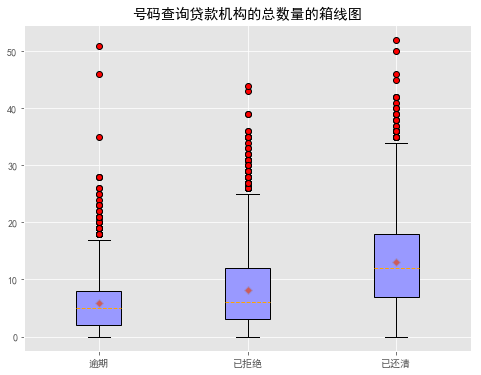

In [41]:
#号码查询贷款机构的总数量
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
fig=plt.figure(figsize=(8,6))
plt.boxplot(x=[Data['号码查询贷款机构的总数量'][yq_index],Data['号码查询贷款机构的总数量'][yjj_index],
               Data['号码查询贷款机构的总数量'][yhq_index]],
            patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['逾期','已拒绝','已还清'])
plt.title('号码查询贷款机构的总数量的箱线图')

In [102]:
print(np.mean(Data['号码查询贷款机构的总数量'][yq_index]))
print(np.mean(Data['号码查询贷款机构的总数量'][yjj_index]))
print(np.mean(Data['号码查询贷款机构的总数量'][yhq_index]))

5.948333333333333
8.1965
13.141666666666667


In [89]:
zongshu_yrdh=Data['一人多号状态'][~Data['一人多号状态'].index.isin(yjj_index)].reset_index(drop = True)

In [90]:
Data['申请状态'][Data['一人多号状态'][Data['一人多号状态'].isnull()].index].value_counts()

Series([], Name: 申请状态, dtype: int64)

In [91]:
#一人多号状态
print(Data['一人多号状态'][yq_index].value_counts())
print(zongshu_yrdh.value_counts())
print(Data['一人多号状态'][yq_index].value_counts()/zongshu_yrdh.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_yrdh.value_counts().index)
df['逾期数']=Data['一人多号状态'][yq_index].value_counts()
df['总数']=zongshu_yrdh.value_counts()
df['逾期率']=Data['一人多号状态'][yq_index].value_counts()/zongshu_yrdh.value_counts()
df

OK           664
NOT_FOUND    361
ALL_FOUND    175
Name: 一人多号状态, dtype: int64
OK           1709
NOT_FOUND     688
ALL_FOUND     603
Name: 一人多号状态, dtype: int64
OK           0.388531
NOT_FOUND    0.524709
ALL_FOUND    0.290216
Name: 一人多号状态, dtype: float64


,逾期数,总数,逾期率
OK,664,1709,0.388531
NOT_FOUND,361,688,0.524709
ALL_FOUND,175,603,0.290216


In [92]:
sum(Data['一人多号状态'][yq_index].value_counts())

1200

In [93]:
print(Data['一人多号状态'][yjj_index].value_counts())
print(Data['一人多号状态'].value_counts())
print(Data['一人多号状态'][yjj_index].value_counts()/Data['一人多号状态'].value_counts())
df=pd.DataFrame()
df.reindex(Data['一人多号状态'].value_counts().index)
df['拒绝数']=Data['一人多号状态'][yjj_index].value_counts()
df['总数']=Data['一人多号状态'].value_counts()
df['拒绝率']=Data['一人多号状态'][yjj_index].value_counts()/Data['一人多号状态'].value_counts()
df

OK                   1195
NOT_FOUND             478
ALL_FOUND             326
INVALID_ID_NUMBER       1
Name: 一人多号状态, dtype: int64
OK                   2904
NOT_FOUND            1166
ALL_FOUND             929
INVALID_ID_NUMBER       1
Name: 一人多号状态, dtype: int64
OK                   0.411501
NOT_FOUND            0.409949
ALL_FOUND            0.350915
INVALID_ID_NUMBER    1.000000
Name: 一人多号状态, dtype: float64


,拒绝数,总数,拒绝率
OK,1195,2904,0.411501
NOT_FOUND,478,1166,0.409949
ALL_FOUND,326,929,0.350915
INVALID_ID_NUMBER,1,1,1.000000


In [94]:
sum(Data['一人多号状态'][yjj_index].value_counts())

2000

In [95]:
print(Data['一人多号状态'][yhq_index].value_counts())
print(zongshu_yrdh.value_counts())
print(Data['一人多号状态'][yhq_index].value_counts()/zongshu_yrdh.value_counts())
df=pd.DataFrame()
df.reindex(zongshu_yrdh.value_counts().index)
df['已还清数']=Data['一人多号状态'][yhq_index].value_counts()
df['总数']=zongshu_yrdh.value_counts()
df['已还清率']=Data['一人多号状态'][yhq_index].value_counts()/zongshu_yrdh.value_counts()
df

OK           1045
ALL_FOUND     428
NOT_FOUND     327
Name: 一人多号状态, dtype: int64
OK           1709
NOT_FOUND     688
ALL_FOUND     603
Name: 一人多号状态, dtype: int64
ALL_FOUND    0.709784
NOT_FOUND    0.475291
OK           0.611469
Name: 一人多号状态, dtype: float64


,已还清数,总数,已还清率
OK,1045,1709,0.611469
ALL_FOUND,428,603,0.709784
NOT_FOUND,327,688,0.475291


In [53]:
sum(Data['一人多号状态'][yhq_index].value_counts())

1800

# advance.ai数据

In [31]:
import pandas as pd
import os
os.chdir('E:\\工作\\2019-5-15\\天贝测试')
label=pd.read_excel('4847.xlsx',header=0)
adv_data1=pd.concat([label['申请状态'],pd.read_excel('blacklist_results.xlsx',header=0)],axis=1)
adv_data2=pd.concat([label['申请状态'],pd.read_excel('credit_result_TUKU天贝_2019-05-14.xlsx',header=0)],axis=1)
adv_data3=pd.concat([label['申请状态'],pd.read_excel('fraud_result_TUKU天贝_2019-05-14.xlsx',header=0)],axis=1)
adv_data4=pd.concat([label['申请状态'],pd.read_excel('id check _results.xlsx',header=0)],axis=1)
adv_data5=pd.concat([label['申请状态'],pd.read_excel('multi_platform_results.xlsx',header=0)],axis=1)
adv_data6=pd.concat([label['申请状态'],pd.read_excel('multi-platform_score_result_TUKU天贝_2019-05-14.xlsx',header=0)],axis=1)
adv_data7=pd.concat([label['申请状态'],pd.read_excel('tele_id_check_results.xlsx',header=0)],axis=1)
adv_data8=pd.concat([label['申请状态'],pd.read_excel('TELE_SCORE.xlsx',header=0)],axis=1)

In [32]:
adv_data1=adv_data1.fillna('空值')
adv_data2=adv_data2.fillna('空值')
adv_data3=adv_data3.fillna('空值')
adv_data4=adv_data4.fillna('空值')
adv_data5=adv_data5.fillna('空值')
adv_data6=adv_data6.fillna('空值')
adv_data7=adv_data7.fillna('空值')
adv_data8=adv_data8.fillna('空值')

In [33]:
adyq_index=label['申请状态'][label['申请状态']=='逾期'].index
adyjj_index=label['申请状态'][label['申请状态']=='已拒绝'].index
adyhq_index=label['申请状态'][label['申请状态']=='已还清'].index

In [34]:
adv_data1

,申请状态,name,phoneNumber,idNumber,code,message,recommendation,hitList
0,已拒绝,zuliardi,6282176468047,1671102004840002,SUCCESS,OK,PASS,[]
1,已还清,zelika,6289617351676,3173064311940003,SUCCESS,OK,REJECT,"[{'hitReason': 'IDNumberAndMobileAndName', 'ev..."
2,逾期,zauhari,6285105766003,3571030510700001,SUCCESS,OK,PASS,[]
3,已还清,zaina rosita,6281210027046,1671155712750001,SUCCESS,OK,PASS,[]
4,已拒绝,yusuf mulyana,6285266448739,3210071601750001,SUCCESS,OK,REJECT,"[{'hitReason': 'IDNumberAndName', 'eventTime':..."
5,已拒绝,yusmanto,6285876697374,3375040607850005,SUCCESS,OK,PASS,[]
6,已拒绝,yuni yuningsih,6289502215668,3215154109930005,SUCCESS,OK,PASS,[]
7,已拒绝,yuliadi iwayan,6282146177622,5104041207690001,SUCCESS,OK,REJECT,"[{'hitReason': 'IDNumberAndMobile', 'eventTime..."
8,已还清,yulia efiyanti,6281321474283,3579035302800002,SUCCESS,OK,PASS,[]
9,已拒绝,yuhardi,6281318322629,3171030601670001,SUCCESS,OK,PASS,[]


In [60]:
black_list=adv_data1['recommendation'][adv_data1['recommendation']=='REJECT'].index
print(black_list)
print(adv_data1['申请状态'][black_list].value_counts())
print('黑名单命中率',adv_data1['申请状态'][black_list].value_counts()['逾期']/(adv_data1['申请状态'][black_list].value_counts()['逾期']+
                              adv_data1['申请状态'][black_list].value_counts()['已还清']))

Int64Index([   1,    4,    7,   13,   18,   25,   27,   29,   30,   35,
            ...
            4826, 4827, 4828, 4829, 4835, 4836, 4838, 4839, 4841, 4846],
           dtype='int64', length=1691)
已拒绝    807
逾期     496
已还清    388
Name: 申请状态, dtype: int64
黑名单命中率 0.5610859728506787


In [59]:
##iziData黑名单
iziblack_list=Data['是否是黑名单用户'][Data['是否是黑名单用户']=='REJECT'].index
print(iziblack_list)
print(Data['申请状态'][iziblack_list].value_counts())
print(Data['申请状态'][iziblack_list].value_counts()['逾期']/(Data['申请状态'][iziblack_list].value_counts()['逾期']+
                              Data['申请状态'][iziblack_list].value_counts()['已还清']))

Int64Index([  57,  121,  124,  146,  147,  169,  178,  227,  252,  258,
            ...
            4650, 4684, 4725, 4726, 4736, 4763, 4764, 4774, 4792, 4815],
           dtype='int64', length=256)
已拒绝    106
已还清     79
逾期      71
Name: 申请状态, dtype: int64
0.47333333333333333


In [7]:
def caculate(data):
    for num in range(3,data.shape[1]):    
        name=data.columns[num]
        zongshu_ex_yjj=data[name][~data[name].index.isin(adyjj_index)].reset_index(drop = True)
        zongshu=data[name].value_counts()
        df=pd.DataFrame()
        df['总数']=data[name].value_counts()
        df.index=zongshu.index
    #   df[name]=df.index
        df['逾期数']=data[name][adyq_index].value_counts()
        df['已还清数']=data[name][adyhq_index].value_counts()
        df['逾期还清总数']=zongshu_ex_yjj.value_counts()
        df['逾期率']=data[name][adyq_index].value_counts()/zongshu_ex_yjj.value_counts()
        df['已还清率']=1-df['逾期率']
        df['已拒绝数']=data[name][adyjj_index].value_counts()
        df['已拒绝率']=data[name][adyjj_index].value_counts()/data[name].value_counts()
        df.to_excel(name+'.xlsx',index=True)
#         df1=pd.DataFrame()
#         df1.reindex(data[name].value_counts().index)
#         df1[name]=df1.index
#         df1['已拒绝数']=data[name][adyjj_index].value_counts()
#         df1['总数']=data[name].value_counts()
#         df1['已拒绝率']=data[name][adyjj_index].value_counts()/data[name].value_counts()
#         df1.to_excel('已拒绝'+name+'.xlsx',index=True)    

In [102]:
os.chdir('E:\\工作\\2019-5-15\\天贝测试'+'\\blaclist_results')
caculate(adv_data1)
os.chdir('E:\\工作\\2019-5-15\\天贝测试'+'\\credit_result_TUKU天贝_2019-05-14')
caculate(adv_data2)
os.chdir('E:\\工作\\2019-5-15\\天贝测试'+'\\fraud_result_TUKU天贝_2019-05-14')
caculate(adv_data3)
os.chdir('E:\\工作\\2019-5-15\\天贝测试'+'\\id check _results')
caculate(adv_data4)
os.chdir('E:\\工作\\2019-5-15\\天贝测试'+'\\multi_platform_results')
caculate(adv_data5)
os.chdir('E:\\工作\\2019-5-15\\天贝测试'+'\\multi-platform_score_result_TUKU天贝_2019-05-14')
caculate(adv_data6)
os.chdir('E:\\工作\\2019-5-15\\天贝测试'+'\\tele_id_check_results')
caculate(adv_data7)

d:\anaconda3\lib\site-packages\pandas\core\generic.py:5006: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  return_indexers=True)
d:\anaconda3\lib\site-packages\pandas\core\generic.py:5006: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  return_indexers=True)


In [10]:
os.chdir('E:\\工作\\2019-5-15\\天贝测试'+'\\tele_score')
def caculate(data):
    for num in range(1,data.shape[1]):    
        name=data.columns[num]
        zongshu_ex_yjj=data[name][~data[name].index.isin(adyjj_index)].reset_index(drop = True)
        zongshu=data[name].value_counts()
        df=pd.DataFrame()
        df['总数']=data[name].value_counts()
        df.index=zongshu.index
    #     df[name]=df.index
        df['逾期数']=data[name][adyq_index].value_counts()
        df['已还清数']=data[name][adyhq_index].value_counts()
        df['逾期还清总数']=zongshu_ex_yjj.value_counts()
        df['逾期率']=data[name][adyq_index].value_counts()/zongshu_ex_yjj.value_counts()
        df['已还清率']=1-df['逾期率']
        df['已拒绝数']=data[name][adyjj_index].value_counts()
        df['已拒绝率']=data[name][adyjj_index].value_counts()/data[name].value_counts()
        df.to_excel(name+'.xlsx',index=True)
caculate(adv_data8)

In [5]:
bin_data=pd.DataFrame({'acredit_score':adv_data2['score'],'afraud_score':adv_data3['score'],'amultiplatform_SCORE':adv_data6['score'],'label':label['申请状态']})
bin_data

,acredit_score,afraud_score,amultiplatform_SCORE,label
0,629,605,523,已拒绝
1,522,632,488,已还清
2,594,601,535,逾期
3,580,639,519,已还清
4,531,536,496,已拒绝
5,556,583,483,已拒绝
6,597,601,501,已拒绝
7,559,610,577,已拒绝
8,450,554,499,已还清
9,528,608,562,已拒绝


In [14]:
newbin_data=bin_data.iloc[~Data['申请状态'].index.isin(adyjj_index),:].reset_index(drop = True)

In [15]:
newbin_data=newbin_data.replace({'逾期':1,'已还清':0})

In [16]:
newbin_data

,acredit_score,afraud_score,amultiplatform_SCORE,label
0,522,632.0,488.0,0
1,594,601.0,535.0,1
2,580,639.0,519.0,0
3,450,554.0,499.0,0
4,548,574.0,492.0,0
5,582,540.0,492.0,1
6,501,579.0,542.0,0
7,578,540.0,482.0,0
8,536,661.0,543.0,1
9,509,531.0,536.0,1


In [17]:
##对于连续的score：credit_result_TUKU天贝_2019-05-14和fraud_result_TUKU天贝_2019-05-14两个文件中的score
def data_cut(data,way,num_bin=5):
    if way=='dengju':
        newdata=pd.DataFrame()
        for col in range(len(data.columns)-1):
            newdata[data.columns[col]]=pd.cut(data.iloc[:,col],num_bin)
        newdata['label']=data['label']
    if way=='dengpin':
        newdata=pd.DataFrame()
        for col in range(len(data.columns)-1):
            newdata[data.columns[col]]=pd.qcut(data.iloc[:,col],num_bin)
        newdata['label']=data['label']
    if way=='zuiyoufenxiang':
        pass
    return newdata
def calcWOE(dataset,col,targe):
    subdata=pd.DataFrame(dataset.groupby(col)[col].count())
    suby=pd.DataFrame(dataset.groupby(col)[targe].sum())
    data=pd.DataFrame(pd.merge(subdata,suby,how="left",left_index=True,right_index=True))
    b_total=data[targe].sum()
    total=data[col].sum()
    g_total=total-b_total
    data["bad"]=data.apply(lambda x:round(x[targe]/b_total,3),axis=1)
    data["good"]=data.apply(lambda x:round((x[col]-x[targe])/g_total,3),axis=1)
    data["WOE"]=data.apply(lambda x:np.log(x.bad/x.good),axis=1)
    return data.loc[:,["bad","good","WOE"]]

In [18]:
Newdata=data_cut(newbin_data,'dengju',num_bin=4)

In [19]:
Newdata

,acredit_score,afraud_score,amultiplatform_SCORE,label
0,"(485.5, 559.0]","(563.0, 639.0]","(447.786, 501.5]",0
1,"(559.0, 632.5]","(563.0, 639.0]","(501.5, 555.0]",1
2,"(559.0, 632.5]","(563.0, 639.0]","(501.5, 555.0]",0
3,"(411.706, 485.5]","(487.0, 563.0]","(447.786, 501.5]",0
4,"(485.5, 559.0]","(563.0, 639.0]","(447.786, 501.5]",0
5,"(559.0, 632.5]","(487.0, 563.0]","(447.786, 501.5]",1
6,"(485.5, 559.0]","(563.0, 639.0]","(501.5, 555.0]",0
7,"(559.0, 632.5]","(487.0, 563.0]","(447.786, 501.5]",0
8,"(485.5, 559.0]","(639.0, 715.0]","(501.5, 555.0]",1
9,"(485.5, 559.0]","(487.0, 563.0]","(501.5, 555.0]",1


In [20]:
result=pd.DataFrame()
sumcount=Newdata['acredit_score'].value_counts()
result['逾期还清总数']=sumcount
# result.index=sumcount.index
result['逾期数']=Newdata['acredit_score'][Newdata['label'][Newdata['label']==1].index].value_counts()
result['credit_score逾期率']=Newdata['acredit_score'][Newdata['label'][Newdata['label']==1].index].value_counts()/sumcount
result

,逾期还清总数,逾期数,credit_score逾期率
"(485.5, 559.0]",1549,702,0.453196
"(559.0, 632.5]",771,144,0.186770
"(411.706, 485.5]",465,336,0.722581
"(632.5, 706.0]",115,14,0.121739


In [21]:
Newdata['acredit_score'].value_counts()

(485.5, 559.0]      1549
(559.0, 632.5]       771
(411.706, 485.5]     465
(632.5, 706.0]       115
Name: acredit_score, dtype: int64

In [22]:
Newdata['acredit_score'][Newdata['label'][Newdata['label']==1].index].value_counts()

(485.5, 559.0]      702
(411.706, 485.5]    336
(559.0, 632.5]      144
(632.5, 706.0]       14
Name: acredit_score, dtype: int64

In [23]:
Newdata['acredit_score'][Newdata['label'][Newdata['label']==1].index].value_counts()/sumcount

(411.706, 485.5]    0.722581
(485.5, 559.0]      0.453196
(559.0, 632.5]      0.186770
(632.5, 706.0]      0.121739
Name: acredit_score, dtype: float64

In [44]:
result=pd.DataFrame()
sumcount=Newdata['afraud_score'].value_counts()
result['逾期还清总数']=sumcount
# result.index=sumcount.index
result['逾期数']=Newdata['afraud_score'][Newdata['label'][Newdata['label']==1].index].value_counts()
result['fraud_score逾期率']=Newdata['afraud_score'][Newdata['label'][Newdata['label']==1].index].value_counts()/sumcount
result

,逾期还清总数,逾期数,fraud_score逾期率
"(563.0, 639.0]",1807,583,0.322634
"(487.0, 563.0]",789,513,0.650190
"(639.0, 715.0]",239,42,0.175732
"(410.696, 487.0]",65,58,0.892308


In [49]:
result=pd.DataFrame()
sumcount=Newdata['amultiplatform_SCORE'].value_counts()
result['逾期还清总数']=sumcount
# result.index=sumcount.index
result['逾期数']=Newdata['amultiplatform_SCORE'][Newdata['label'][Newdata['label']==1].index].value_counts()
result['multiplatform_SCORE逾期率']=Newdata['amultiplatform_SCORE'][Newdata['label'][Newdata['label']==1].index].value_counts()/sumcount
result

,逾期还清总数,逾期数,multiplatform_SCORE逾期率
"(501.5, 555.0]",1651,624,0.377953
"(447.786, 501.5]",744,415,0.557796
"(555.0, 608.5]",466,154,0.330472
"(608.5, 662.0]",39,3,0.076923


In [46]:
calcWOE(Newdata,'acredit_score','label')

,bad,good,WOE
acredit_score,,,
"(411.706, 485.5]",0.281,0.076,1.307621
"(485.5, 559.0]",0.587,0.497,0.166435
"(559.0, 632.5]",0.120,0.368,-1.120591
"(632.5, 706.0]",0.012,0.059,-1.592631


In [47]:
calcWOE(Newdata,'afraud_score','label')

,bad,good,WOE
afraud_score,,,
"(410.696, 487.0]",0.048,0.004,2.484907
"(487.0, 563.0]",0.429,0.162,0.973861
"(563.0, 639.0]",0.487,0.718,-0.388205
"(639.0, 715.0]",0.035,0.116,-1.198242


In [48]:
calcWOE(Newdata,'amultiplatform_SCORE','label')

,bad,good,WOE
amultiplatform_SCORE,,,
"(447.786, 501.5]",0.347,0.193,0.586635
"(501.5, 555.0]",0.522,0.603,-0.144250
"(555.0, 608.5]",0.129,0.183,-0.349674
"(608.5, 662.0]",0.003,0.021,-1.945910


In [151]:
def calcIV(dataset):
    dataset["IV"]=dataset.apply(lambda x:(x.bad-x.good)*x.WOE,axis=1)
    IV=sum(dataset["IV"])
    return IV

In [152]:
calcIV(calcWOE(Newdata,'credit_score','label'))

0.6358017676700325

# izi 2019-5-17

In [124]:
import os
os.chdir('D:\\工作\\2019-5-17')
label=pd.read_excel('测试数据标签.xlsx',header=0)
label=label.reset_index(drop=True)
izidata=pd.concat([label['申请状态'],pd.read_excel('izi_wd_20190516.xlsx',header=0)],axis=1)
izidata

,申请状态,姓名,手机号,身份证,常用联系人号码,常用联系人号码.1,常用联系人号码.2,常用联系人号码.3,常用联系人号码.4,身份证和姓名是否匹配,...,号码14天之内查询贷款机构的数量,号码21天之内查询贷款机构的数量,号码30天之内查询贷款机构的数量,号码60天之内查询贷款机构的数量,号码90天之内查询贷款机构的数量,号码查询贷款机构的总数量,一人多号状态,身份证号码下面的手机号,手机号所属的身份证号,手机号所属身份证号下的手机号
0,已拒绝,SHINTIA MARLINA,87878363535,3275066103850022,NaN,NaN,NaN,NaN,NaN,PERSON_NOT_FOUND,...,0,0,0,0,0,7,NOT_FOUND,NaN,NaN,NaN
1,已拒绝,MEGA KOESOEMA,87776328844,3201135106830005,NaN,NaN,NaN,NaN,NaN,NOT,...,0,0,0,0,0,5,OK,"+6281285764858,+6282112934609",NaN,NaN
2,已还清,HENGKI ANDRIYAS,8175253550,3515082104790009,NaN,NaN,NaN,NaN,NaN,OK,...,1,1,2,5,10,18,OK,+6281333302850,NaN,NaN
3,已拒绝,CHYNTIA MEIRINA,85219722195,3202016905890005,NaN,NaN,NaN,NaN,NaN,OK,...,0,0,0,0,1,5,OK,+6285659989973,NaN,NaN
4,已拒绝,ENDAR PRAHASTITA,87872732130,3175036104890007,NaN,NaN,NaN,NaN,NaN,OK,...,0,0,0,0,0,10,NOT_FOUND,NaN,NaN,NaN
5,已拒绝,Rodiyah,81904038959,3402124501770004,NaN,NaN,NaN,NaN,NaN,OK,...,1,1,1,3,4,8,OK,+6289607727221,NaN,NaN
6,已拒绝,INRIANY,87780737346,3173036404940001,NaN,NaN,NaN,NaN,NaN,OK,...,0,2,2,2,2,17,OK,+6281316369816,NaN,NaN
7,已拒绝,TIKA KARTIKAWATY RAHAYU,81310780873,3175095308730008,NaN,NaN,NaN,NaN,NaN,OK,...,0,0,0,1,3,4,OK,"+6281386779104,+6285711599467,+628558380625",NaN,NaN
8,已拒绝,AGUS ENDANG DWANTO,87784135162,3173010311840020,NaN,NaN,NaN,NaN,NaN,OK,...,2,3,4,10,16,29,OK,+62895330290670,NaN,NaN
9,已还清,BAYU SETYO NUGROHO,87823150156,3204050709790003,NaN,NaN,NaN,NaN,NaN,OK,...,0,0,0,4,8,17,NOT_FOUND,NaN,NaN,NaN


In [125]:
izidata['申请状态'].value_counts() #.sum()

已拒绝    5000
已还清    1971
逾期      706
Name: 申请状态, dtype: int64

In [128]:
izidata=izidata.fillna('空值')
izidata['申请状态'].value_counts()

已拒绝    5000
已还清    1971
逾期      706
Name: 申请状态, dtype: int64

In [129]:
Dataperson_info=pd.DataFrame()
Dataperson_info['手机号']=izidata['手机号'].astype('str')
Dataperson_info['身份证']=izidata['身份证'].astype('str')
Dataperson_info['身份证号码下面的手机号']=izidata['身份证号码下面的手机号'].astype('str')
Dataperson_info['手机号所属的身份证号']=izidata['手机号所属的身份证号'].astype('str')
Dataperson_info['手机号所属身份证号下的手机号']=izidata['手机号所属身份证号下的手机号'].astype('str')
Dataperson_info['申请状态']=izidata['申请状态'].astype('str')
Dataperson_info.head(5)

,手机号,身份证,身份证号码下面的手机号,手机号所属的身份证号,手机号所属身份证号下的手机号,申请状态
0,87878363535,3275066103850022,空值,空值,空值,已拒绝
1,87776328844,3201135106830005,"+6281285764858,+6282112934609",空值,空值,已拒绝
2,8175253550,3515082104790009,+6281333302850,空值,空值,已还清
3,85219722195,3202016905890005,+6285659989973,空值,空值,已拒绝
4,87872732130,3175036104890007,空值,空值,空值,已拒绝


In [130]:
for i in range(len(Dataperson_info['身份证号码下面的手机号'])):
    if Dataperson_info['身份证号码下面的手机号'][i]!='空值':
        Dataperson_info['身份证号码下面的手机号'][i]=len(Dataperson_info['身份证号码下面的手机号'][i].split(','))
    else:
        pass 

In [131]:
iziyq_index=izidata['申请状态'][izidata['申请状态']=='逾期'].index
iziyjj_index=izidata['申请状态'][izidata['申请状态']=='已拒绝'].index
iziyhq_index=izidata['申请状态'][izidata['申请状态']=='已还清'].index

In [132]:
zongshu_ex_yjj=Dataperson_info['身份证号码下面的手机号'][~Dataperson_info['身份证号码下面的手机号'].index.isin(iziyjj_index)].reset_index(drop = True)
zongshu=Dataperson_info['身份证号码下面的手机号'].value_counts()
df=pd.DataFrame()
df['总数']=Dataperson_info['身份证号码下面的手机号'].value_counts()
df.index=zongshu.index
#   df[name]=df.index
df['逾期数']=Dataperson_info['身份证号码下面的手机号'][iziyq_index].value_counts()
df['已还清数']=Dataperson_info['身份证号码下面的手机号'][iziyhq_index].value_counts()
df['逾期还清总数']=zongshu_ex_yjj.value_counts()
df['逾期率']=Dataperson_info['身份证号码下面的手机号'][iziyq_index].value_counts()/zongshu_ex_yjj.value_counts()
df['已还清率']=1-df['逾期率']
df['已拒绝数']=Dataperson_info['身份证号码下面的手机号'][iziyjj_index].value_counts()
df['已拒绝率']=Dataperson_info['身份证号码下面的手机号'][iziyjj_index].value_counts()/Dataperson_info['身份证号码下面的手机号'].value_counts()
print('逾期\n',Dataperson_info['身份证号码下面的手机号'][iziyq_index].value_counts())
print('已拒绝\n',Dataperson_info['身份证号码下面的手机号'][iziyjj_index].value_counts())
print('已还清\n',Dataperson_info['身份证号码下面的手机号'][yihq_index].value_counts())
##一人多号个数
df

逾期
 空值    344
1     159
2     126
3      52
4      13
5       7
6       3
9       1
7       1
Name: 身份证号码下面的手机号, dtype: int64
已拒绝
 空值    2404
2     1011
1      966
3      383
4      127
5       45
6       34
7       12
8        6
10       4
11       3
9        2
18       1
13       1
12       1
Name: 身份证号码下面的手机号, dtype: int64
已还清
 空值    762
2     361
1     344
3     154
4      49
5      20
6      10
7       3
10      1
Name: 身份证号码下面的手机号, dtype: int64


,总数,逾期数,已还清数,逾期还清总数,逾期率,已还清率,已拒绝数,已拒绝率
空值,3657,344.0,909.0,1253.0,0.274541,0.725459,2404,0.657369
2,1607,126.0,470.0,596.0,0.211409,0.788591,1011,0.629123
1,1440,159.0,315.0,474.0,0.335443,0.664557,966,0.670833
3,615,52.0,180.0,232.0,0.224138,0.775862,383,0.622764
4,203,13.0,63.0,76.0,0.171053,0.828947,127,0.625616
5,70,7.0,18.0,25.0,0.280000,0.720000,45,0.642857
6,45,3.0,8.0,11.0,0.272727,0.727273,34,0.755556
7,18,1.0,5.0,6.0,0.166667,0.833333,12,0.666667
8,8,NaN,2.0,2.0,NaN,NaN,6,0.750000
10,4,NaN,NaN,NaN,NaN,NaN,4,1.000000


In [77]:
iziyq_index=izidata['申请状态'][izidata['申请状态']=='逾期'].index
iziyjj_index=izidata['申请状态'][izidata['申请状态']=='已拒绝'].index
iziyhq_index=izidata['申请状态'][izidata['申请状态']=='已还清'].index
os.chdir('E:\\工作\\2019-5-17\\分析结果')
def caculate(data):
    for num in range(3,data.shape[1]):    
        name=data.columns[num]
        zongshu_ex_yjj=data[name][~data[name].index.isin(iziyjj_index)].reset_index(drop = True)
        zongshu=data[name].value_counts()
        df=pd.DataFrame()
        df['总数']=data[name].value_counts()
        df.index=zongshu.index
    #   df[name]=df.index
        df['逾期数']=data[name][iziyq_index].value_counts()
        df['已还清数']=data[name][iziyhq_index].value_counts()
        df['逾期还清总数']=zongshu_ex_yjj.value_counts()
        df['逾期率']=data[name][iziyq_index].value_counts()/zongshu_ex_yjj.value_counts()
        df['已还清率']=1-df['逾期率']
        df['已拒绝数']=data[name][iziyjj_index].value_counts()
        df['已拒绝率']=data[name][iziyjj_index].value_counts()/data[name].value_counts()
        df.to_excel(name+'.xlsx',index=True)

In [78]:
caculate(izidata)

## 多条规则筛选（5-17数据）

In [39]:
index_whatsapp=izidata['whatsapp是否开通'][izidata['whatsapp是否开通']=='yes'].index
data1=izidata.iloc[index_whatsapp,:] #3974
times1=data1['申请状态'].value_counts()
print('times1逾期率：',times1['逾期']/(times1['逾期']+times1['已还清']))

index_number30days_query=data1['号码30天之内查询贷款机构的数量'][data1['号码30天之内查询贷款机构的数量']>=1].index
data2=izidata.iloc[index_number30days_query,:]#2320
times2=data2['申请状态'].value_counts()
print('times2逾期率：',times2['逾期']/(times2['逾期']+times2['已还清']))

index_numbersum_query=data2['号码查询贷款机构的总数量'][data2['号码查询贷款机构的总数量']>=2].index
data3=izidata.iloc[index_numbersum_query,:] #2293
times3=data3['申请状态'].value_counts()
print('times3逾期率：',times3['逾期']/(times3['逾期']+times3['已还清']))

index_hmsc=data3['号码时长状态'][data3['号码时长状态']=='OK'].index
data4=izidata.iloc[index_hmsc,:]#2205
times4=data4['申请状态'].value_counts()
print('times4逾期率：',times4['逾期']/(times4['逾期']+times4['已还清']))

index_hmzwsc=data4['号码在网时长'][data4['号码在网时长'].isin(['12month+','6-8month','8-10month','10-12month'])].index
data5=izidata.iloc[index_hmzwsc,:]#1660
times5=data5['申请状态'].value_counts()
print('times5逾期率：',times5['逾期']/(times5['逾期']+times5['已还清']))

index_zjxy=data5['身份认证_宗教信仰'][data5['身份认证_宗教信仰']!='空值'].index
data6=izidata.iloc[index_zjxy,:]#1583
times6=data6['申请状态'].value_counts()
print('times6逾期率：',times6['逾期']/(times6['逾期']+times6['已还清']))

index_id30days_query=data6['身份证30天之内查询贷款机构的数量'][data6['身份证30天之内查询贷款机构的数量']>=1].index
data7=izidata.iloc[index_id30days_query,:]#1314
times7=data7['申请状态'].value_counts()
print('times7逾期率：',times7['逾期']/(times7['逾期']+times7['已还清']))

index_id_name_match=data7['身份证和姓名是否匹配'][data7['身份证和姓名是否匹配']=='OK'].index
data8=izidata.iloc[index_id_name_match]#1263
times8=data8['申请状态'].value_counts()
print('times8逾期率：',times8['逾期']/(times8['逾期']+times8['已还清']))

index_smrz=data8['实名认证'][data8['实名认证'].isin(['NOT_FOUND','MATCH'])].index
data9=izidata.iloc[index_smrz] #780
times9=data9['申请状态'].value_counts()
print('times9逾期率：',times9['逾期']/(times9['逾期']+times9['已还清']))

# index_marriage=data9['身份认证_婚姻状况'][~data9['身份认证_婚姻状况'].isin(['空值'])].index
# data10=izidata.iloc[index_marriage]
# times10=data10['申请状态'].value_counts()
# print('times10逾期率：',times10['逾期']/(times10['逾期']+times10['已还清']))

# # index_occupy=data10['身份认证_职业'][~data10['身份认证_职业'].isin(['空值','BELUM/TIDAK BEKERJA'])].index
# # data11=Data.iloc[index_occupy]
# # times11=data11['申请状态'].value_counts() 
# # print('times11逾期率：',times11['逾期']/(times11['逾期']+times11['已还清']))

# index_idsum_query=data10['身份证查询贷款机构的总数量'][data10['身份证查询贷款机构的总数量']>=0].index
# data12=izidata.iloc[index_idsum_query]
# times12=data12['申请状态'].value_counts()
# print('times12逾期率：',times12['逾期']/(times12['逾期']+times12['已还清']))

# index_sjhxsfz=data12['身份证号码下面的手机号'][data12['身份证号码下面的手机号']!='空值'].index
# data13=Data.iloc[index_sjhxsfz]
# times13=data13['申请状态'].value_counts()
# print('times13逾期率：',times13['逾期']/(times13['逾期']+times13['已还清']))
# tddata=tongdun.iloc[data12.index,:]
# index_Bin30day_decision=tddata['Borrower_applied_multiplatform_in30day_score'][tddata['Borrower_applied_multiplatform_in30day_score']!='空值'
#                                                                                  ].index
# data13=Data.iloc[index_Bin30day_decision,:]
# times13=data13['申请状态'].value_counts()

# index_sex=data12['身份认证_性别'][data12['身份认证_性别'].isin(['LAKI-LAKI'])].index
# data13=izidata.iloc[index_sex,:]
# times13=data13['申请状态'].value_counts()
# print('times13逾期率：',times13['逾期']/(times13['逾期']+times13['已还清']))

Countshu=data9['申请状态'].value_counts()
print(Countshu)

times1逾期率： 0.2371850564726325
times2逾期率： 0.1810048176187199
times3逾期率： 0.17712691771269176
times4逾期率： 0.15083393763596809
times5逾期率： 0.1234375
times6逾期率： 0.1234375
times7逾期率： 0.11180124223602485
times8逾期率： 0.10787992495309569
times9逾期率： 0.09851551956815115
已拒绝    916
已还清    668
逾期      73
Name: 申请状态, dtype: int64


In [29]:
#逾期率、准入率、放款率
print('逾期率:',Countshu['逾期']/(Countshu['逾期']+Countshu['已还清']))
print('准入率:',((Countshu['逾期']+Countshu['已还清'])*1+Countshu['已拒绝']*22)/120000)
print('放款率:',((Countshu['逾期']+Countshu['已还清'])*1)/((Countshu['逾期']+Countshu['已还清'])*1+Countshu['已拒绝']*22))
print('7677条中进入规则总数：',sum(Countshu))

逾期率: 0.09851551956815115
准入率: 0.17410833333333334
放款率: 0.03546642416120232
4847条中进入规则总数： 1657


In [76]:
706/(706+1971)

0.2637280537915577

In [492]:
158+106+69

333

In [14]:
110000/5000

22.0

In [85]:
Newdata=pd.DataFrame()
Newdata['id_name']=Data['身份证和姓名是否匹配']
Newdata['sex']=Data['身份认证_性别']
Newdata['zjxy']=Data['身份认证_宗教信仰']
Newdata['hyzk']=Data['身份认证_婚姻状况']
Newdata['occupy']=Data['身份认证_职业']
Newdata['hmsczt']=Data['号码时长状态']
Newdata['hmzwsc']=Data['号码在网时长']
Newdata['hmd']=Data['是否是黑名单用户']
Newdata['zmrz']=Data['实名认证']
Newdata['whatsapp']=Data['whatsapp是否开通']
Newdata['id_query_num']=Data['身份证查询贷款机构的总数量']
Newdata['number_query_num']=Data['号码查询贷款机构的总数量']
Newdata['yrdhzt']=Data['一人多号状态']
Newdata['label']=Data['申请状态']

In [87]:
Data1=Newdata.iloc[Newdata['label'][Newdata['label']=='逾期'].index]
Data2=Newdata.iloc[Newdata['label'][Newdata['label']=='已还清'].index]

In [88]:
Data3=pd.concat([Data1,Data2],axis=0,ignore_index=True)
Data3.head()

,id_name,sex,zjxy,hyzk,occupy,hmsczt,hmzwsc,hmd,zmrz,whatsapp,id_query_num,number_query_num,yrdhzt,label
0,OK,LAKI-LAKI,ISLAM,KAWIN,KARYAWAN SWASTA,OK,12month+,PASS,MATCH,no,9.0,6,OK,逾期
1,OK,PEREMPUAN,ISLAM,KAWIN,MENGURUS RUMAH TANGGA,PHONENUMBER_NOT_FOUND,NaN,PASS,NOT_MATCH,yes,18.0,0,OK,逾期
2,OK,LAKI-LAKI,ISLAM,KAWIN,KARYAWAN SWASTA,OK,12month+,PASS,MATCH,yes,5.0,3,OK,逾期
3,OK,PEREMPUAN,BUDHA,BELUM KAWIN,KARYAWAN SWASTA,OK,6-8month,PASS,MATCH,yes,2.0,2,OK,逾期
4,OK,LAKI-LAKI,ISLAM,BELUM KAWIN,PELAJAR/MAHASISWA,OK,12month+,PASS,MATCH,yes,7.0,5,ALL_FOUND,逾期


In [94]:
Data3['label']=Data3['label'].replace({'逾期':'1','已还清':'0'})

In [103]:
Data3.to_csv('shuju.csv',index=False)

In [62]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

In [70]:
X=Data3.iloc[:,:-1]
y=Data3.iloc[:,-1]
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=9,
                         stratify=y)

In [79]:
X.isnull().any()

id_name匹配        False
性别                True
宗教信仰              True
婚姻状况              True
职业                True
号码时长状态           False
号码在网时长            True
是否是黑名单用户         False
实名认证             False
whatsapp是否开通     False
身份证查询贷款机构的总数量    False
号码查询贷款机构的总数量     False
一人多号状态           False
dtype: bool

# 特征结合

In [107]:
sjh=Data['手机号所属身份证号下的手机号'].dropna().reset_index(drop=True)
length_sjh=[]
for i in range(len(sjh)):
    length_sjh.append(len(sjh[i].split(',')))
length_sjh

[1,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 4,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 1,
 3,
 3,
 2,
 4,
 2,
 3,
 2,
 4,
 3,
 5,
 3,
 1,
 5,
 2,
 3,
 4,
 2,
 1,
 1,
 5,
 2,
 1,
 5,
 2,
 2,
 1,
 5,
 6,
 3,
 2,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 3,
 2,
 2,
 2,
 1,
 1,
 4,
 2,
 11,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 5,
 2,
 3,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 4,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 4,
 2,
 2,
 3,
 1,
 2,
 3,
 2,
 4,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 3,
 2,
 2,
 1,
 3,
 2,
 4,
 3,
 2,
 2,
 2,
 1,
 4,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 5,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 1,
 2,
 4,
 2,
 1,
 3,
 3,
 7,
 1,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 3,
 5,
 1,
 4,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 1,
 1,
 2,
 3,
 3,
 7,
 4,
 3,
 2,
 4,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 1,
 2,
 6,
 1,
 3,
 2,
 3,
 4,
 1,
 2,
 2,
 5,
 2,
 4,
 3,
 2,
 3,
 2,
 3

In [108]:
pd.Series(length_sjh).value_counts()

2     808
3     308
1     230
4     115
5      47
6      10
8       7
7       6
11      4
15      3
10      2
14      1
12      1
9       1
dtype: int64

In [109]:
data_sjhyq=Data['手机号所属身份证号下的手机号'][yq_index].dropna().reset_index(drop=True)
# data_sjhzongshu=
length_sjhyq=[]
for i in range(len(data_sjhyq)):
    length_sjhyq.append(len(data_sjhyq[i].split(',')))
pd.Series(length_sjhyq).value_counts()/pd.Series(length_sjh).value_counts()

1     0.178261
2     0.184406
3     0.149351
4     0.173913
5     0.170213
6     0.100000
7     0.166667
8          NaN
9     1.000000
10         NaN
11         NaN
12         NaN
14    1.000000
15         NaN
dtype: float64

In [122]:
data_sjhyjj=Data['手机号所属身份证号下的手机号'][yjj_index].dropna().reset_index(drop=True)
# data_sjhzongshu=
length_sjhyjj=[]
for i in range(len(data_sjhyjj)):
    length_sjhyjj.append(len(data_sjhyjj[i].split(',')))
pd.Series(length_sjhyjj).value_counts()/pd.Series(length_sjh).value_counts()

1     0.460870
2     0.373762
3     0.425325
4     0.391304
5     0.340426
6     0.600000
7     0.500000
8     0.428571
9          NaN
10    0.500000
11    0.500000
12    1.000000
14         NaN
15    0.666667
dtype: float64

In [121]:
data_sjhyhq=Data['手机号所属身份证号下的手机号'][yhq_index].dropna().reset_index(drop=True)
# data_sjhzongshu=
length_sjhyhq=[]
for i in range(len(data_sjhyhq)):
    length_sjhyhq.append(len(data_sjhyhq[i].split(',')))
pd.Series(length_sjhyhq).value_counts()/pd.Series(length_sjh).value_counts()

1     0.360870
2     0.441832
3     0.425325
4     0.434783
5     0.489362
6     0.300000
7     0.333333
8     0.571429
9          NaN
10    0.500000
11    0.500000
12         NaN
14         NaN
15    0.333333
dtype: float64

In [110]:
zongshu_sjh=Data['手机号所属身份证号下的手机号'][~Data['手机号所属身份证号下的手机号'].index.isin(yjj_index)].reset_index(drop = True)

In [115]:
sjh_yqhq=zongshu_sjh.dropna().reset_index(drop=True)
length_sjh_yqhq=[]
for i in range(len(sjh_yqhq)):
    length_sjh_yqhq.append(len(sjh_yqhq[i].split(',')))
length_sjh_yqhq

[4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 4,
 2,
 11,
 2,
 3,
 5,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 3,
 1,
 3,
 2,
 4,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 4,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 5,
 1,
 1,
 3,
 2,
 2,
 3,
 2,
 4,
 2,
 3,
 7,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 3,
 4,
 2,
 4,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 1,
 6,
 1,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 5,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 4,
 2,
 2,
 3,
 2,
 4,
 4,
 2,
 4,
 3,
 5,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 5,
 2,
 3,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 5,
 3,
 1,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 6,
 2,
 3,
 2,
 1,
 3,
 2,
 2,
 2,
 1,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,

In [116]:
len(length_sjh)

1543

In [117]:
len(length_sjh_yqhq)

925

In [118]:
print(pd.Series(length_sjhyq).value_counts())
print(pd.Series(length_sjh_yqhq).value_counts())
print(pd.Series(length_sjhyq).value_counts()/pd.Series(length_sjh_yqhq).value_counts())
df=pd.DataFrame()
df.reindex(pd.Series(length_sjh).value_counts().index)
df['逾期数']=pd.Series(length_sjhyq).value_counts()
df['总数']=pd.Series(length_sjh_yqhq).value_counts()
df['逾期率']=pd.Series(length_sjhyq).value_counts()/pd.Series(length_sjh_yqhq).value_counts()
df

2     149
3      46
1      41
4      20
5       8
14      1
9       1
7       1
6       1
dtype: int64
2     506
3     177
1     124
4      70
5      31
8       4
6       4
7       3
11      2
15      1
14      1
10      1
9       1
dtype: int64
1     0.330645
2     0.294466
3     0.259887
4     0.285714
5     0.258065
6     0.250000
7     0.333333
8          NaN
9     1.000000
10         NaN
11         NaN
14    1.000000
15         NaN
dtype: float64


,逾期数,总数,逾期率
2,149,506,0.294466
3,46,177,0.259887
1,41,124,0.330645
4,20,70,0.285714
5,8,31,0.258065
14,1,1,1.000000
9,1,1,1.000000
7,1,3,0.333333
6,1,4,0.250000


In [123]:
print(pd.Series(length_sjhyjj).value_counts())
print(pd.Series(length_sjh).value_counts())
print(pd.Series(length_sjhyjj).value_counts()/pd.Series(length_sjh).value_counts())
df=pd.DataFrame()
df.reindex(pd.Series(length_sjh).value_counts().index)
df['已拒绝数']=pd.Series(length_sjhyjj).value_counts()
df['总数']=pd.Series(length_sjh).value_counts()
df['已拒绝率']=pd.Series(length_sjhyjj).value_counts()/pd.Series(length_sjh).value_counts()
df

2     302
3     131
1     106
4      45
5      16
6       6
8       3
7       3
15      2
11      2
12      1
10      1
dtype: int64
2     808
3     308
1     230
4     115
5      47
6      10
8       7
7       6
11      4
15      3
10      2
14      1
12      1
9       1
dtype: int64
1     0.460870
2     0.373762
3     0.425325
4     0.391304
5     0.340426
6     0.600000
7     0.500000
8     0.428571
9          NaN
10    0.500000
11    0.500000
12    1.000000
14         NaN
15    0.666667
dtype: float64


,已拒绝数,总数,已拒绝率
2,302,808,0.373762
3,131,308,0.425325
1,106,230,0.460870
4,45,115,0.391304
5,16,47,0.340426
6,6,10,0.600000
8,3,7,0.428571
7,3,6,0.500000
15,2,3,0.666667
11,2,4,0.500000


In [125]:
print(pd.Series(length_sjhyhq).value_counts())
print(pd.Series(length_sjh_yqhq).value_counts())
print(pd.Series(length_sjhyhq).value_counts()/pd.Series(length_sjh_yqhq).value_counts())
df=pd.DataFrame()
df.reindex(pd.Series(length_sjh_yqhq).value_counts().index)
df['已还清数']=pd.Series(length_sjhyhq).value_counts()
df['总数']=pd.Series(length_sjh_yqhq).value_counts()
df['已还清率']=pd.Series(length_sjhyhq).value_counts()/pd.Series(length_sjh_yqhq).value_counts()
df

2     357
3     131
1      83
4      50
5      23
8       4
6       3
11      2
7       2
15      1
10      1
dtype: int64
2     506
3     177
1     124
4      70
5      31
8       4
6       4
7       3
11      2
15      1
14      1
10      1
9       1
dtype: int64
1     0.669355
2     0.705534
3     0.740113
4     0.714286
5     0.741935
6     0.750000
7     0.666667
8     1.000000
9          NaN
10    1.000000
11    1.000000
14         NaN
15    1.000000
dtype: float64


,已还清数,总数,已还清率
2,357,506,0.705534
3,131,177,0.740113
1,83,124,0.669355
4,50,70,0.714286
5,23,31,0.741935
8,4,4,1.000000
6,3,4,0.750000
11,2,2,1.000000
7,2,3,0.666667
15,1,1,1.000000


In [126]:
Data['申请状态'][Data['手机号所属身份证号下的手机号'][Data['手机号所属身份证号下的手机号'].isnull()].index].value_counts()

已拒绝    1382
已还清    1143
逾期      932
Name: 申请状态, dtype: int64

In [128]:
932+1143

2075

In [129]:
932/2075,1143/2075,1382/(1382+2075)

(0.4491566265060241, 0.5508433734939759, 0.3997685854787388)